**bold text**# CIP Deviations and its implications for Systemic Stress

Importing necessary libraries below

In [ ]:
!pip install arch # Install the arch package
!pip install quandl
!pip install yfinance pandas matplotlib
!pip install openpyxl lxml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import quandl
import seaborn as sns
import yfinance as yf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from arch import arch_model
from statsmodels.tsa.stattools import adfuller
from statsmodels.nonparametric.kernel_regression import KernelReg
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from functools import reduce
import xml.etree.ElementTree as ET




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 17.6 MB/s eta 0:00:00


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

file_path_ForwardRateUSDtoEUR = '/content/drive/MyDrive/Colab Notebooks/ForwardRateUSDtoEUR.xlsx'
df_ForwardRateUSDtoEUR = pd.read_excel(file_path_ForwardRateUSDtoEUR, engine='openpyxl', header=1)
print(df_ForwardRateUSDtoEUR.head())

file_path_SpotRateUSDtoEUR = '/content/drive/MyDrive/Colab Notebooks/SpotRateUSDtoEUR.xlsx'
df_SpotRateUSDtoEUR = pd.read_excel(file_path_SpotRateUSDtoEUR, engine='openpyxl', header=1)
print(df_SpotRateUSDtoEUR.head())

file_path_USDTreasuryRate = '/content/drive/MyDrive/Colab Notebooks/USDTreasuryRate.xlsx'
df_USDTreasuryRate = pd.read_excel(file_path_USDTreasuryRate, engine='openpyxl', header=1)
print(df_USDTreasuryRate.head())

file_path_EUROBIR = '/content/drive/MyDrive/Colab Notebooks/EUROBIR.xlsx'
df_EUROBIR = pd.read_excel(file_path_EUROBIR, engine='openpyxl', header=1)
print(df_EUROBIR.head())

file_path_GDP_growth = '/content/drive/MyDrive/Colab Notebooks/GDP_growth.xlsx'
df_GDP_growth = pd.read_excel(file_path_GDP_growth, engine='openpyxl', header=1)
print(df_GDP_growth.head())

file_path_1 = '/content/drive/MyDrive/Colab Notebooks/1.xlsx'
df_1 = pd.read_excel(file_path_1, engine='openpyxl')
print(df_1.head())

file_path_2 = '/content/drive/MyDrive/Colab Notebooks/2.xlsx'
df_2 = pd.read_excel(file_path_2, engine='openpyxl')
print(df_2.head())

file_path_4 = '/content/drive/MyDrive/Colab Notebooks/4.xlsx'
df_4 = pd.read_excel(file_path_4, engine='openpyxl')
print(df_4.head())

file_path_5_1 = '/content/drive/MyDrive/Colab Notebooks/5_1.xlsx'
df_5_1 = pd.read_excel(file_path_5_1, engine='openpyxl')
print(df_5_1.head())

file_path_5_2 = '/content/drive/MyDrive/Colab Notebooks/5_2.xlsx'
df_5_2 = pd.read_excel(file_path_5_2, engine='openpyxl')
print(df_5_2.head())

file_path_6_1 = '/content/drive/MyDrive/Colab Notebooks/6_1.xlsx'
df_6_1 = pd.read_excel(file_path_6_1, engine='openpyxl')
print(df_6_1.head())

file_path_6_2 = '/content/drive/MyDrive/Colab Notebooks/6_2.xlsx'
df_6_2 = pd.read_excel(file_path_6_2, engine='openpyxl')
print(df_6_2.head())

file_path_8 = '/content/drive/MyDrive/Colab Notebooks/8.xlsx'
df_8 = pd.read_excel(file_path_8, engine='openpyxl')
print(df_8.head())

file_path_10_1 = '/content/drive/MyDrive/Colab Notebooks/10_1.xlsx'
df_10_1 = pd.read_excel(file_path_10_1, engine='openpyxl')
print(df_10_1.head())

file_path_10_2 = '/content/drive/MyDrive/Colab Notebooks/10_2.xlsx'
df_10_2 = pd.read_excel(file_path_10_2, engine='openpyxl')
print(df_10_2.head())

file_path_11 = '/content/drive/MyDrive/Colab Notebooks/11.xlsx'
df_11 = pd.read_excel(file_path_11, engine='openpyxl')
print(df_11.head())

file_path_usd = '/content/drive/MyDrive/Colab Notebooks/usd.xlsx'
df_usd = pd.read_excel(file_path_usd, engine='openpyxl')
print(df_usd.head())

file_path_gbp = '/content/drive/MyDrive/Colab Notebooks/gbp.xlsx'
df_gbp = pd.read_excel(file_path_gbp, engine='openpyxl')
print(df_gbp.head())

file_path_jpy = '/content/drive/MyDrive/Colab Notebooks/jpy.xlsx'
df_jpy = pd.read_excel(file_path_jpy, engine='openpyxl')
print(df_jpy.head())

file_path_sek = '/content/drive/MyDrive/Colab Notebooks/sek.xlsx'
df_sek = pd.read_excel(file_path_sek, engine='openpyxl')
print(df_sek.head())

file_path_chf = '/content/drive/MyDrive/Colab Notebooks/chf.xlsx'
df_chf = pd.read_excel(file_path_chf, engine='openpyxl')
print(df_chf.head())

# Base folder for cleaned forward rates
forward_base_path = '/content/drive/MyDrive/Colab Notebooks/Forward Rates all currencies/Cleaned/'

# EUR to CHF Forward Rate
file_path_eur_chf = forward_base_path + 'ForwardRateEURtoCHF.xlsx'
df_eur_chf = pd.read_excel(file_path_eur_chf, engine='openpyxl')
print(df_eur_chf.head())

# EUR to GBP Forward Rate
file_path_eur_gbp = forward_base_path + 'ForwardRateEURtoGBP.xlsx'
df_eur_gbp = pd.read_excel(file_path_eur_gbp, engine='openpyxl')
print(df_eur_gbp.head())

# EUR to JPY Forward Rate
file_path_eur_jpy = forward_base_path + 'ForwardRateEURtoJPY.xlsx'
df_eur_jpy = pd.read_excel(file_path_eur_jpy, engine='openpyxl')
print(df_eur_jpy.head())

# EUR to SEK Forward Rate
file_path_eur_sek = forward_base_path + 'ForwardRateEURtoSEK.xlsx'
df_eur_sek = pd.read_excel(file_path_eur_sek, engine='openpyxl')
print(df_eur_sek.head())

# Base folder for interest rates
interest_base_path = '/content/drive/MyDrive/Colab Notebooks/Interest Rates all currencies/'

# CHF Interest Rate
file_path_CHFTreasuryRate = interest_base_path + 'CHFTreasuryRate.xlsx'
df_CHFTreasuryRate = pd.read_excel(file_path_CHFTreasuryRate, engine='openpyxl')
print(df_CHFTreasuryRate.head())

# GBP Interest Rate
file_path_GBPOvernightRate = interest_base_path + 'GBPOvernightRate.xlsx'
df_GBPOvernightRate = pd.read_excel(file_path_GBPOvernightRate, engine='openpyxl')
print(df_GBPOvernightRate.head())

# JPY Interest Rate
file_path_JPYOvernightRate = interest_base_path + 'JPYOvernightRate.xlsx'
df_JPYOvernightRate = pd.read_excel(file_path_JPYOvernightRate, engine='openpyxl')
print(df_JPYOvernightRate.head())

# SEK Interest Rate
file_path_SEKTreasuryRate = interest_base_path + 'SEKTreasuryRate.xlsx'
df_SEKTreasuryRate = pd.read_excel(file_path_SEKTreasuryRate, engine='openpyxl')
print(df_SEKTreasuryRate.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        Date  ForwardRateUSDtoEUR  ForwardRateUSDtoEUR_low  \
0 2025-05-09             0.889205                 0.888099   
1 2025-05-08             0.890710                 0.882068   
2 2025-05-07             0.884956                 0.878812   
3 2025-05-06             0.879507                 0.878580   
4 2025-05-05             0.883783                 0.879894   

   ForwardRateUSDtoEUR_high  
0                  0.893096  
1                  0.891902  
2                  0.885583  
3                  0.886525  
4                  0.885583  
         Date SpotRateUSDtoEUR
0  1999-01-04         0.846597
1  1999-01-05          0.85034
2  1999-01-06         0.859402
3  1999-01-07         0.856751
4  1999-01-08         0.865501
         Date  USDTreasuryRate
0  1954-01-04             1.33
1  1954-01-05             1.28
2  1954-01-06             1.28
3  1954-

In [ ]:
# 1. Expand monthly JPY Overnight Rate to daily
def expand_monthly_to_daily(df, date_col='Date', rate_col='JPYOvernightRate'):
    return pd.concat([pd.DataFrame({date_col: pd.date_range(pd.to_datetime(row[date_col]).replace(day=1), pd.to_datetime(row[date_col]).replace(day=1) + pd.offsets.MonthEnd(0)), rate_col: row[rate_col]}) for _, row in df.iterrows()]).reset_index(drop=True)
df_JPYOvernightRate = expand_monthly_to_daily(df_JPYOvernightRate, date_col='Date', rate_col='JPYOvernightRate')

# Step 1: Create the list of DataFrames
dfs = [
    df_ForwardRateUSDtoEUR, df_SpotRateUSDtoEUR, df_USDTreasuryRate, df_EUROBIR,
    df_usd, df_jpy, df_sek, df_chf, df_gbp,
    df_eur_chf, df_eur_gbp, df_eur_jpy, df_eur_sek,
    df_CHFTreasuryRate, df_GBPOvernightRate, df_JPYOvernightRate, df_SEKTreasuryRate
]

# Step 2: Ensure 'Date' is datetime and set as index
for i, df in enumerate(dfs):
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])  # parse
        df.set_index('Date', inplace=True)       # set as index
    elif df.index.name != 'Date':
        raise ValueError(f"DataFrame {i} is missing 'Date' index or column")

# Step 3: Merge them on the index
merged_df = reduce(lambda left, right: pd.merge(
    left, right, how='outer', left_index=True, right_index=True), dfs)

# Step 4: Optional - sort by Date
merged_df.sort_index(inplace=True)

merged_df = merged_df.drop(columns=['level_0', 'index'], errors='ignore')
merged_df = merged_df[merged_df.index >= '1999-01-01']
merged_df = merged_df.reset_index()
# Done!
print(merged_df.head())





        Date  ForwardRateUSDtoEUR  ForwardRateUSDtoEUR_low  \
0 1999-01-01                  NaN                      NaN   
1 1999-01-02                  NaN                      NaN   
2 1999-01-03                  NaN                      NaN   
3 1999-01-04             0.845666                 0.838012   
4 1999-01-05             0.850268                 0.840901   

   ForwardRateUSDtoEUR_high SpotRateUSDtoEUR  USDTreasuryRate  EUROBIR  \
0                       NaN              NaN              NaN    3.244   
1                       NaN              NaN              NaN      NaN   
2                       NaN              NaN              NaN      NaN   
3                  0.854847         0.846597             4.38    3.234   
4                  0.852297          0.85034             4.37    3.223   

      USD     JPY     SEK  ...  ForwardRateEURtoJPY  ForwardRateEURtoJPY_low  \
0     NaN     NaN     NaN  ...                  NaN                      NaN   
1     NaN     NaN     

In [ ]:
#Ensuring all variables are numeric
merged = merged_df

cols_to_convert = merged.columns.difference(['Date', 'Year'])


for col in cols_to_convert:
    merged[col] = pd.to_numeric(merged[col], errors='coerce')

#convert variables to eur to usd
# Invert spot rate and forward rate
merged['SpotRateEURtoUSD'] = 1 / merged['SpotRateUSDtoEUR']
merged['ForwardRateEURtoUSD'] = 1 / merged['ForwardRateUSDtoEUR']

# For high/low forward rates, invert and swap low and high
merged['ForwardRateEURtoUSD_low'] = 1 / merged['ForwardRateUSDtoEUR_high']   # low becomes inverse of high
merged['ForwardRateEURtoUSD_high'] = 1 / merged['ForwardRateUSDtoEUR_low']   # high becomes inverse of low
print(merged.columns.tolist())

['Date', 'ForwardRateUSDtoEUR', 'ForwardRateUSDtoEUR_low', 'ForwardRateUSDtoEUR_high', 'SpotRateUSDtoEUR', 'USDTreasuryRate', 'EUROBIR', 'USD', 'JPY', 'SEK', 'CHF', 'GBP', 'ForwardRateEURtoCHF', 'ForwardRateEURtoCHF_low', 'ForwardRateEURtoCHF_high', 'ForwardRateEURtoGBP', 'ForwardRateEURtoGBP_low', 'ForwardRateEURtoGBP_high', 'ForwardRateEURtoJPY', 'ForwardRateEURtoJPY_low', 'ForwardRateEURtoJPY_high', 'ForwardRateEURtoSEK', 'ForwardRateEURtoSEK_low', 'ForwardRateEURtoSEK_high', 'CHFTreasuryRate', 'GBPOvernightRate', 'JPYOvernightRate', 'SEKTreasuryRate', 'SpotRateEURtoUSD', 'ForwardRateEURtoUSD', 'ForwardRateEURtoUSD_low', 'ForwardRateEURtoUSD_high']


In [ ]:
# Check for invalid (non-positive) values before applying log
# Columns to check (all except 'Date' and 'Year')
cols_to_check = merged.columns.difference(['Date', 'Year'])

# Build a mask that is True only where all selected columns are > 0
mask = (merged[cols_to_check] > 0).all(axis=1)

# Filter the DataFrame using the mask
merged_filtered = merged[mask]

In [ ]:
print(merged.columns.tolist())
#Calculating CIP deviation according to Hernandez
merged["rho_usd"] = np.log(merged["ForwardRateEURtoUSD"]) - np.log(merged["SpotRateEURtoUSD"])
merged["x_usd"] = merged["EUROBIR"] - merged["USDTreasuryRate"] - merged["rho_usd"]

merged["rho_gbp"] = np.log(merged["ForwardRateEURtoGBP"]) - np.log(merged["GBP"])
merged["x_gbp"] = merged["EUROBIR"] - merged["GBPOvernightRate"] - merged["rho_gbp"]

merged["rho_jpy"] = np.log(merged["ForwardRateEURtoJPY"]) - np.log(merged["JPY"])
merged["x_jpy"] = merged["EUROBIR"] - merged["JPYOvernightRate"] - merged["rho_jpy"]

merged["rho_sek"] = np.log(merged["ForwardRateEURtoSEK"]) - np.log(merged["SEK"])
merged["x_sek"] = merged["EUROBIR"] - merged["SEKTreasuryRate"] - merged["rho_sek"]

merged["rho_chf"] = np.log(merged["ForwardRateEURtoCHF"]) - np.log(merged["CHF"])
merged["x_chf"] = merged["EUROBIR"] - merged["CHFTreasuryRate"] - merged["rho_chf"]

#Compute trading costs from bid-ask spread
# -------------------------------
merged["ForwardSpread_usd"] = merged["ForwardRateEURtoUSD_high"] - merged["ForwardRateEURtoUSD_low"]
merged["TradingCost_usd"] = merged["ForwardSpread_usd"] / merged["SpotRateEURtoUSD"]  # Approx basis in returns

merged["ForwardSpread_gbp"] = merged["ForwardRateEURtoGBP_high"] - merged["ForwardRateEURtoGBP_low"]
merged["TradingCost_gbp"] = merged["ForwardSpread_gbp"] / merged["GBP"]  # Approx basis in returns

merged["ForwardSpread_jpy"] = merged["ForwardRateEURtoJPY_high"] - merged["ForwardRateEURtoJPY_low"]
merged["TradingCost_jpy"] = merged["ForwardSpread_jpy"] / merged["JPY"]  # Approx basis in returns

merged["ForwardSpread_sek"] = merged["ForwardRateEURtoSEK_high"] - merged["ForwardRateEURtoSEK_low"]
merged["TradingCost_sek"] = merged["ForwardSpread_sek"] / merged["SEK"]  # Approx basis in returns

merged["ForwardSpread_chf"] = merged["ForwardRateEURtoCHF_high"] - merged["ForwardRateEURtoCHF_low"]
merged["TradingCost_chf"] = merged["ForwardSpread_chf"] / merged["CHF"]  # Approx basis in returns

# List all trading cost columns
trading_cost_cols = [
    "TradingCost_usd",
    "TradingCost_gbp",
    "TradingCost_jpy",
    "TradingCost_sek",
    "TradingCost_chf"
]

# Replace 0 with NaN and forward-fill for each
for col in trading_cost_cols:
    merged[col].replace(0, np.nan, inplace=True)
    merged[col].fillna(method="ffill", inplace=True)  # Or use merged[col].ffill(inplace=True)


['Date', 'ForwardRateUSDtoEUR', 'ForwardRateUSDtoEUR_low', 'ForwardRateUSDtoEUR_high', 'SpotRateUSDtoEUR', 'USDTreasuryRate', 'EUROBIR', 'USD', 'JPY', 'SEK', 'CHF', 'GBP', 'ForwardRateEURtoCHF', 'ForwardRateEURtoCHF_low', 'ForwardRateEURtoCHF_high', 'ForwardRateEURtoGBP', 'ForwardRateEURtoGBP_low', 'ForwardRateEURtoGBP_high', 'ForwardRateEURtoJPY', 'ForwardRateEURtoJPY_low', 'ForwardRateEURtoJPY_high', 'ForwardRateEURtoSEK', 'ForwardRateEURtoSEK_low', 'ForwardRateEURtoSEK_high', 'CHFTreasuryRate', 'GBPOvernightRate', 'JPYOvernightRate', 'SEKTreasuryRate', 'SpotRateEURtoUSD', 'ForwardRateEURtoUSD', 'ForwardRateEURtoUSD_low', 'ForwardRateEURtoUSD_high']


<ipython-input-6-2343346255>:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged[col].replace(0, np.nan, inplace=True)
<ipython-input-6-2343346255>:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

In [ ]:
#saving data file with cip deviation, forward rate, spote rate, interest rates
merged.to_csv('merged.csv', index=False)
# Preview result
merged = merged.dropna()
print(merged.head())

          Date  ForwardRateUSDtoEUR  ForwardRateUSDtoEUR_low  \
175 1999-07-01             0.977517                 0.962279   
181 1999-07-07             0.978857                 0.973425   
186 1999-07-12             0.985804                 0.980296   
207 1999-08-02             0.936330                 0.933794   
208 1999-08-03             0.936768                 0.933968   

     ForwardRateUSDtoEUR_high  SpotRateUSDtoEUR  USDTreasuryRate  EUROBIR  \
175                  0.980296          0.976944             4.55    2.654   
181                  0.980681          0.978091             4.54    2.662   
186                  0.988924          0.986291             4.57    2.664   
207                  0.940999          0.937998             4.65    2.697   
208                  0.940999          0.936330             4.70    2.705   

        USD     JPY     SEK  ...  ForwardSpread_usd  TradingCost_usd  \
175  1.0264  124.12  8.7215  ...             0.0191         0.018660   
181  1.0

<ipython-input-8-3262436398>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged["Date"] = pd.to_datetime(merged["Date"], errors='coerce')


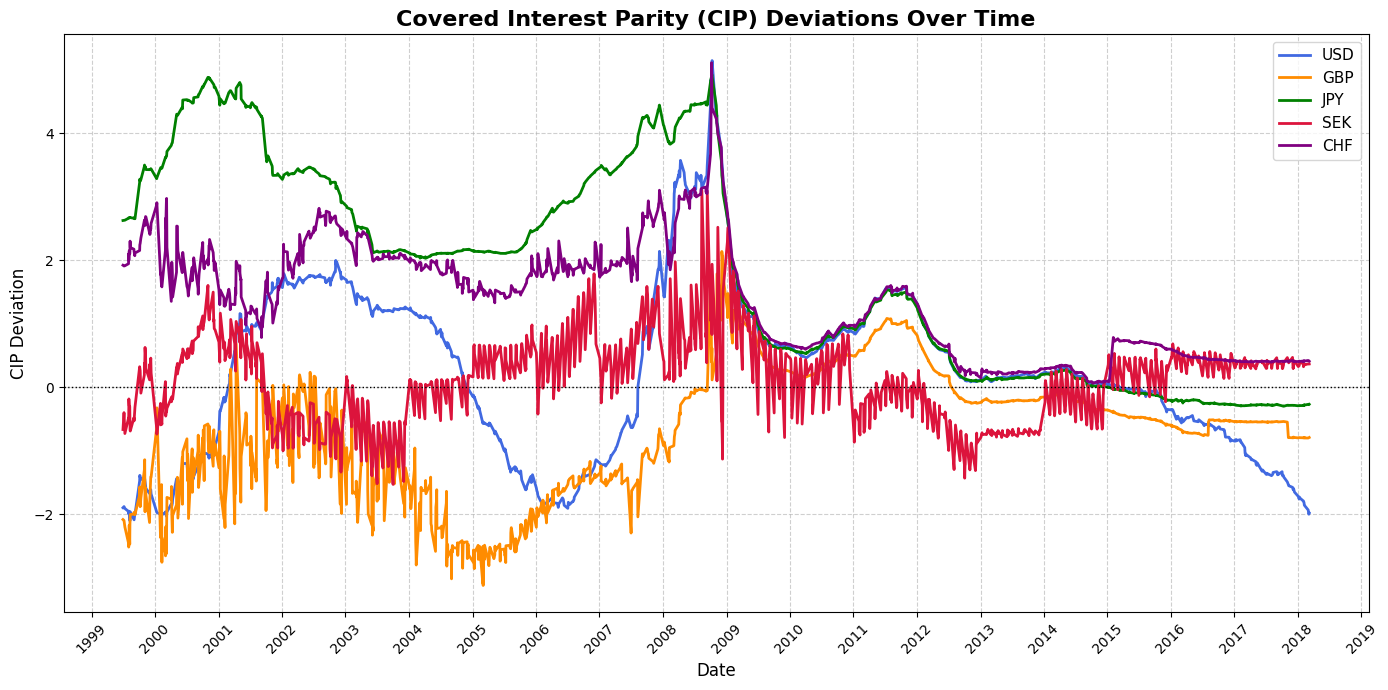

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure 'Date' is datetime and sorted
merged["Date"] = pd.to_datetime(merged["Date"], errors='coerce')
merged = merged.sort_values("Date")

# List of CIP deviation columns and labels
cip_columns = {
    "x_usd": "USD",
    "x_gbp": "GBP",
    "x_jpy": "JPY",
    "x_sek": "SEK",
    "x_chf": "CHF"
}

# Color palette
colors = ["royalblue", "darkorange", "green", "crimson", "purple"]

# Create figure
plt.figure(figsize=(14, 7))

for (col, label), color in zip(cip_columns.items(), colors):
    # Drop NaNs to avoid broken lines
    temp = merged[["Date", col]].dropna()
    if temp.empty:
        continue  # skip if no data
    plt.plot(temp["Date"], temp[col], label=f"{label}", color=color, linewidth=2)

# Formatting
plt.title("Covered Interest Parity (CIP) Deviations Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("CIP Deviation", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# X-axis formatting
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Zero line
plt.axhline(0, color='black', linestyle=':', linewidth=1)

# Legend and layout
plt.legend(loc="upper right", fontsize=11)
plt.tight_layout()

# Save & Show
plt.savefig("CIP_Deviations_AllCurrencies_Cleaned.png", dpi=300)
plt.show()


In [ ]:
#Constructing market stress inputs

#IMPORTING, MERGING AND CREATING DATASET FOR CONSTRUCTION OF CISS
#Download EURO STOXX 50 historical data
# -----------------------------
# STEP 1: DOWNLOAD AND PREPARE df_8
# -----------------------------
stoxx = yf.download('^STOXX50E', start='2000-01-01', end='2024-12-31')
stoxx['log_return'] = np.log(stoxx['Close'] / stoxx['Close'].shift(1))
stoxx['realized_vol_21d'] = stoxx['log_return'].rolling(window=21).std() * np.sqrt(252)
df_8 = stoxx.reset_index()[['Date', 'realized_vol_21d']]
df_8.rename(columns={'realized_vol_21d': 'df_8'}, inplace=True)

# -----------------------------
# STEP 2: DOWNLOAD ANOTHER DATASET (e.g., df_x)
# -----------------------------
data = yf.download('EUFN', start='2000-01-01').reset_index()
print(data.head())  # just for inspection

# Assume df_1, df_2, df_4, df_5_1, df_5_2, df_6_1, df_6_2, df_10_1, df_10_2, df_11 are defined similarly.

dfs = [df_1, df_2, df_4, df_5_1, df_5_2, df_6_1, df_6_2, df_8, df_10_1, df_10_2, df_11]
print(dfs)

# -----------------------------
# STEP 4: CLEAN EACH DATAFRAME
# -----------------------------
for i, df in enumerate(dfs):
    # Clean column names
    df.columns = df.columns.map(str).str.strip()

    if 'Date' not in df.columns:
        df.reset_index(inplace=True)

        # Find any column that looks like a date column after reset_index
        possible_date_cols = [col for col in df.columns if 'date' in col.lower()]

        if possible_date_cols:
            # Rename the first found date-like column to 'Date'
            df.rename(columns={possible_date_cols[0]: 'Date'}, inplace=True)
        else:
            # Fallback: rename the first column to 'Date'
            df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

    # Convert 'Date' column to datetime (coerce errors to NaT)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    dfs[i] = df

# -----------------------------
# STEP 5: MERGE ALL ON 'Date'
# -----------------------------
merged_df = dfs[0]
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on='Date', how='outer', suffixes=('', '_dup'))
    dup_cols = [col for col in merged_df.columns if col.endswith('_dup')]
    merged_df.drop(columns=dup_cols, inplace=True)

merged_df = merged_df.sort_values('Date').reset_index(drop=True)

# -----------------------------
# STEP 6: DERIVED VARIABLES
# -----------------------------
merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month

# Merge monthly data for variables '2' and '3' if exist
if set(['Year', 'Month', '2', '3']).issubset(merged_df.columns):
    monthly_data = merged_df[['Year', 'Month', '2', '3']].drop_duplicates()
    merged_df = merged_df.drop(columns=['2', '3'], errors='ignore')
    merged_df = pd.merge(merged_df, monthly_data, on=['Year', 'Month'], how='left')

# Merge yearly data for variables '6.1' and '6.2' if exist
if set(['Year', '6.1', '6.2']).issubset(merged_df.columns):
    yearly_data = merged_df[['Year', '6.1', '6.2']].drop_duplicates()
    merged_df = merged_df.drop(columns=['6.1', '6.2'], errors='ignore')
    merged_df = pd.merge(merged_df, yearly_data, on='Year', how='left')

# Convert selected columns to numeric
for col in ['1', '2', '6.1', '6.2', '10.1', '10.2']:
    if col in merged_df.columns:
        merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Calculate derived columns
merged_df['3'] = merged_df['2'] - merged_df['1'] if all(c in merged_df.columns for c in ['2', '1']) else np.nan
merged_df['5'] = merged_df['5_1'] - merged_df['5_2'] if all(c in merged_df.columns for c in ['5_1', '5_2']) else np.nan
merged_df['7'] = merged_df['6.1'] - merged_df['6.2'] if all(c in merged_df.columns for c in ['6.1', '6.2']) else np.nan

# Rolling correlation for variable '10'
if all(c in merged_df.columns for c in ['10.1', '10.2']):
    merged_df['10'] = merged_df['10.1'].rolling(window=30, min_periods=10).corr(merged_df['10.2'])

print (merged_df.head())

# Flatten any multi-level columns
merged_df.columns = [col if isinstance(col, str) else col[0] for col in merged_df.columns]
print (merged_df.head())
# Optional: Rename any unwanted 'Unnamed' columns (if present)
rename_map = {
    'Unnamed: 1': '1',
    'Unnamed: 2': '2',
    'Unnamed: 3': '3',
    'Unnamed: 4': '4',
    'Unnamed: 5': '5',
    'Unnamed: 6': '6_1',
    'Unnamed: 7': '6_2',
    'Unnamed: 8': '8',
    'Unnamed: 9': '10_1',
    'Unnamed: 10': '10_2',
}
merged_df.rename(columns=rename_map, inplace=True)

print(merged_df.head(10))
print(merged_df.columns.tolist())

# --- Step 2: Create Block Indicators ---
# Ensure numeric columns for averaging
merged_df['money_block'] = merged_df[['1', '2', '3']].mean(axis=1, skipna=True)
merged_df['bond_block'] = merged_df[['4', '5', '7']].mean(axis=1, skipna=True)
merged_df['equity_block'] = merged_df[["('df_8', '')"]].mean(axis=1, skipna=True)  # Updated: Include '11'
merged_df['fin_block'] = merged_df[['10']].mean(axis=1, skipna=True)

# Check for missing values in block indicators
print(merged_df[['money_block', 'bond_block', 'equity_block', 'fin_block']].isna().sum())

# --- Step 3: Clean and Prepare for Systemic Correlation ---
block_cols = ['money_block', 'bond_block', 'equity_block', 'fin_block']
existing_blocks = [col for col in block_cols if col in merged_df.columns]

# Drop rows with NaNs in these block columns
merged_df_clean = merged_df.dropna(subset=existing_blocks).reset_index(drop=True)





YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price        Date      Close       High        Low       Open Volume
Ticker                  EUFN       EUFN       EUFN       EUFN   EUFN
0      2010-02-03  13.012829  13.012829  13.012829  13.012829    700
1      2010-02-04  13.012829  13.012829  13.012829  13.012829      0
2      2010-02-05  13.012829  13.012829  13.012829  13.012829      0
3      2010-02-08  13.012829  13.012829  13.012829  13.012829      0
4      2010-02-09  12.139520  12.139520  12.099036  12.099036   1800
[           Date      1
0    1999-01-04  3.200
1    1999-01-05  3.200
2    1999-01-06  3.210
3    1999-01-07  3.210
4    1999-01-08  3.210
...         ...    ...
6874 2025-05-09  2.169
6875 2025-05-12  2.170
6876 2025-05-13  2.172
6877 2025-05-14  2.172
6878 2025-05-15  2.172

[6879 rows x 2 columns],           Date       2
0   1994-01-31  6.9100
1   1994-02-28  6.8600
2   1994-03-31  6.7500
3   1994-04-30  6.5700
4   1994-05-31  6.2400
..         ...     ...
371 2024-12-31  2.8161
372 2025-01-31  2.7031
373 202



====== Processing: USD ======

Estimating τ = 0.05
Estimating τ = 0.95
Cointegration test p-value: 0.0849
=> Cointegrated. Using levels.
                            OLS Regression Results                            
Dep. Variable:                    VOL   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     39.46
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           4.69e-10
Time:                        08:03:39   Log-Likelihood:                 159.47
No. Observations:                1195   AIC:                            -314.9
Df Residuals:                    1193   BIC:                            -304.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025     

<ipython-input-37-2476770382>:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_data["BW"] = comp_data["Band_Width_scaled"]
<ipython-input-37-2476770382>:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_data["VOL"] = comp_data["FX_RealizedVol_scaled"]


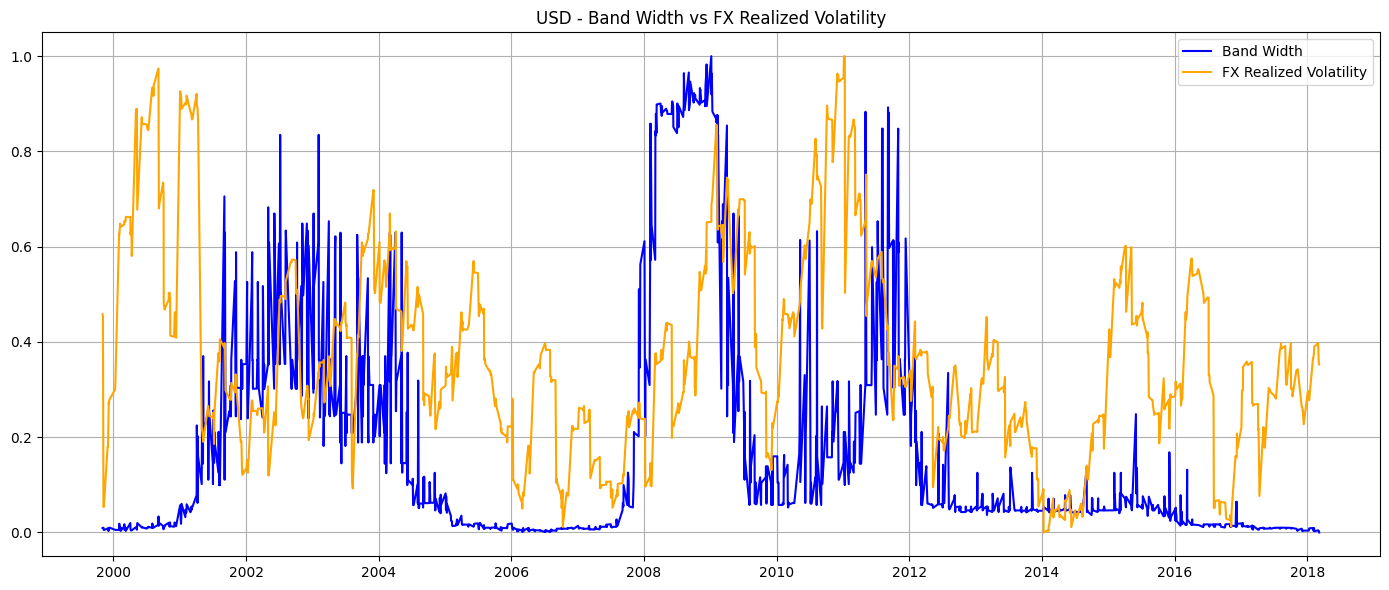



====== Processing: GBP ======

Estimating τ = 0.05
Estimating τ = 0.95
Cointegration test p-value: 0.1263
=> Cointegrated. Using levels.
                            OLS Regression Results                            
Dep. Variable:                    VOL   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     49.99
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           2.62e-12
Time:                        08:03:40   Log-Likelihood:                 200.71
No. Observations:                1195   AIC:                            -397.4
Df Residuals:                    1193   BIC:                            -387.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025     

<ipython-input-37-2476770382>:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_data["BW"] = comp_data["Band_Width_scaled"]
<ipython-input-37-2476770382>:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_data["VOL"] = comp_data["FX_RealizedVol_scaled"]


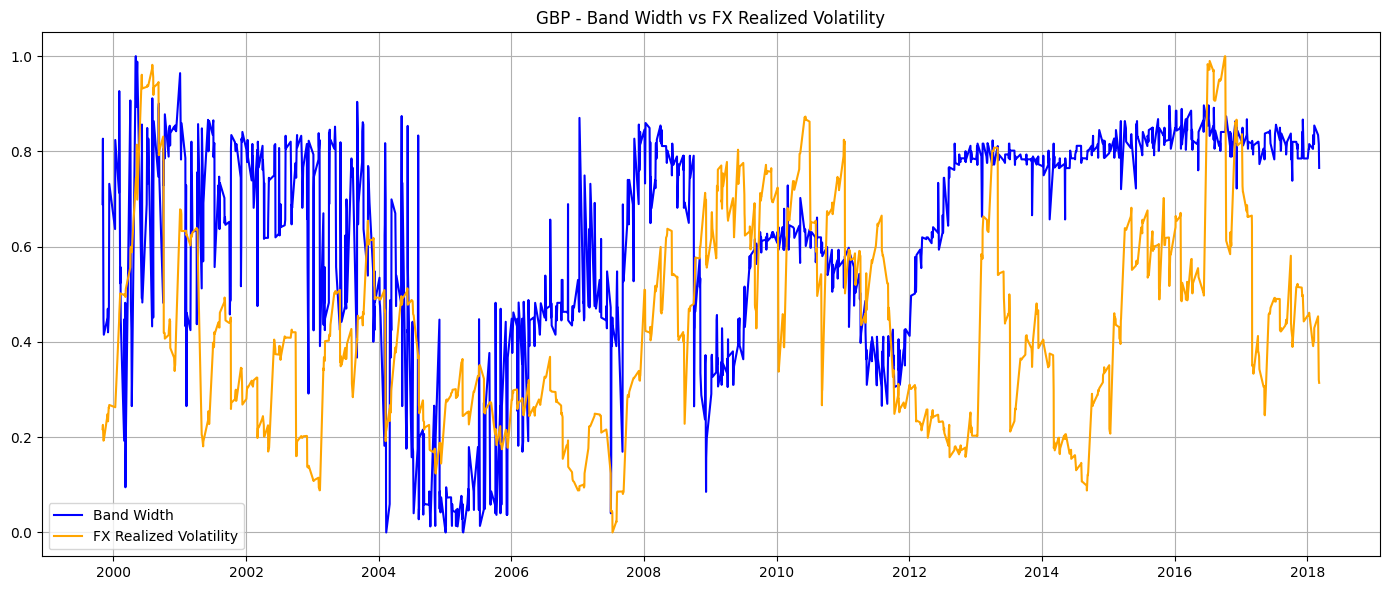



====== Processing: JPY ======

Estimating τ = 0.05
Estimating τ = 0.95
Cointegration test p-value: 0.0060
=> Cointegrated. Using levels.
                            OLS Regression Results                            
Dep. Variable:                    VOL   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     68.01
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           4.25e-16
Time:                        08:03:41   Log-Likelihood:                 264.17
No. Observations:                1195   AIC:                            -524.3
Df Residuals:                    1193   BIC:                            -514.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025     

<ipython-input-37-2476770382>:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_data["BW"] = comp_data["Band_Width_scaled"]
<ipython-input-37-2476770382>:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_data["VOL"] = comp_data["FX_RealizedVol_scaled"]


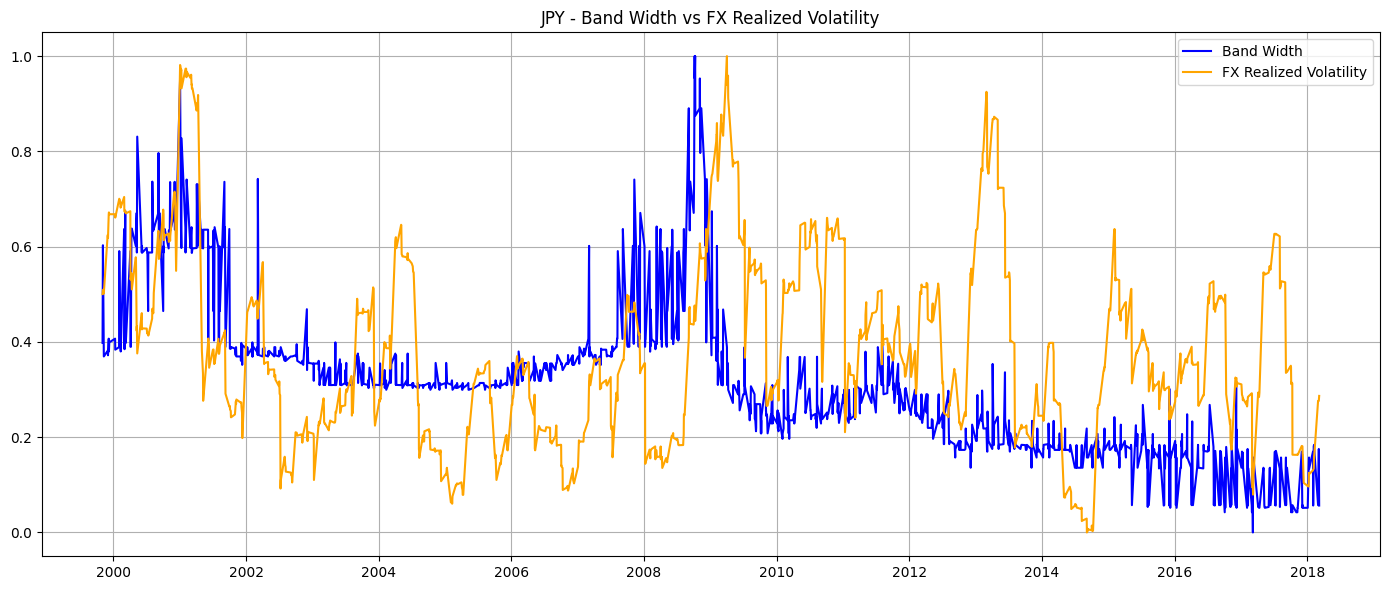



====== Processing: SEK ======

Estimating τ = 0.05
Estimating τ = 0.95
Cointegration test p-value: 0.0216
=> Cointegrated. Using levels.
                            OLS Regression Results                            
Dep. Variable:                    VOL   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     286.4
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           9.50e-58
Time:                        08:03:42   Log-Likelihood:                 598.38
No. Observations:                1195   AIC:                            -1193.
Df Residuals:                    1193   BIC:                            -1183.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025     

<ipython-input-37-2476770382>:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_data["BW"] = comp_data["Band_Width_scaled"]
<ipython-input-37-2476770382>:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_data["VOL"] = comp_data["FX_RealizedVol_scaled"]


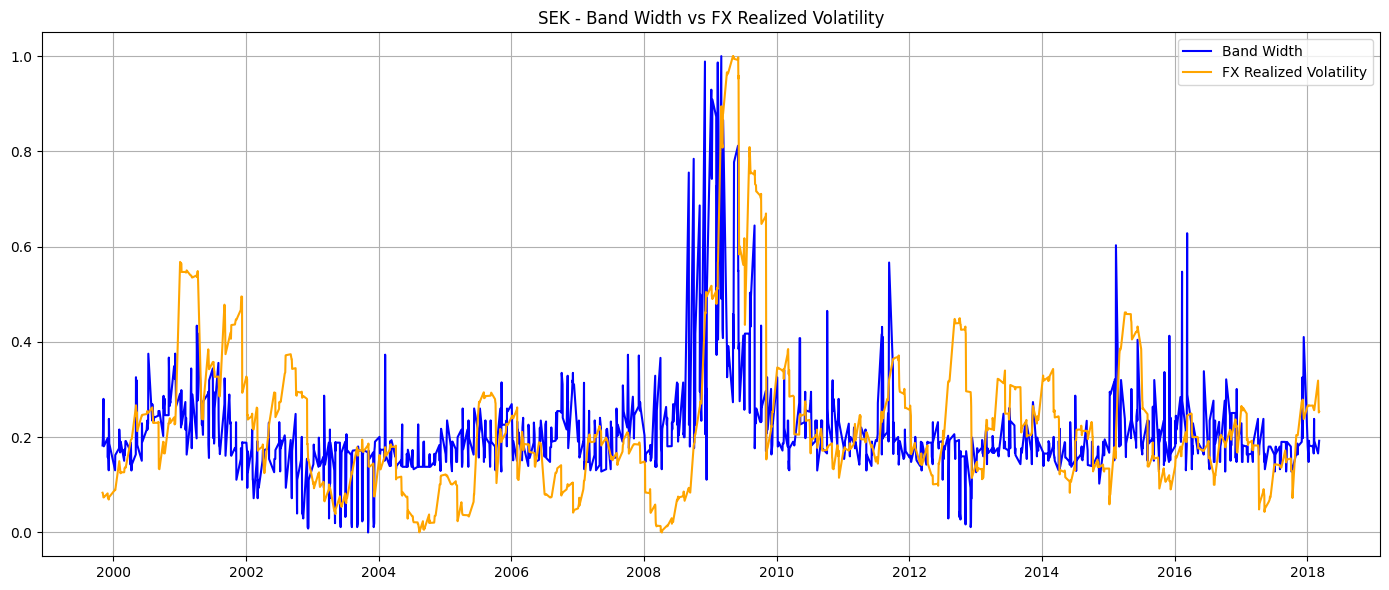



====== Processing: CHF ======

Estimating τ = 0.05
Estimating τ = 0.95
Cointegration test p-value: 0.0148
=> Cointegrated. Using levels.
                            OLS Regression Results                            
Dep. Variable:                    VOL   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     8.287
Date:                Wed, 11 Jun 2025   Prob (F-statistic):            0.00406
Time:                        08:03:43   Log-Likelihood:                 433.96
No. Observations:                1195   AIC:                            -863.9
Df Residuals:                    1193   BIC:                            -853.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025     

<ipython-input-37-2476770382>:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_data["BW"] = comp_data["Band_Width_scaled"]
<ipython-input-37-2476770382>:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_data["VOL"] = comp_data["FX_RealizedVol_scaled"]


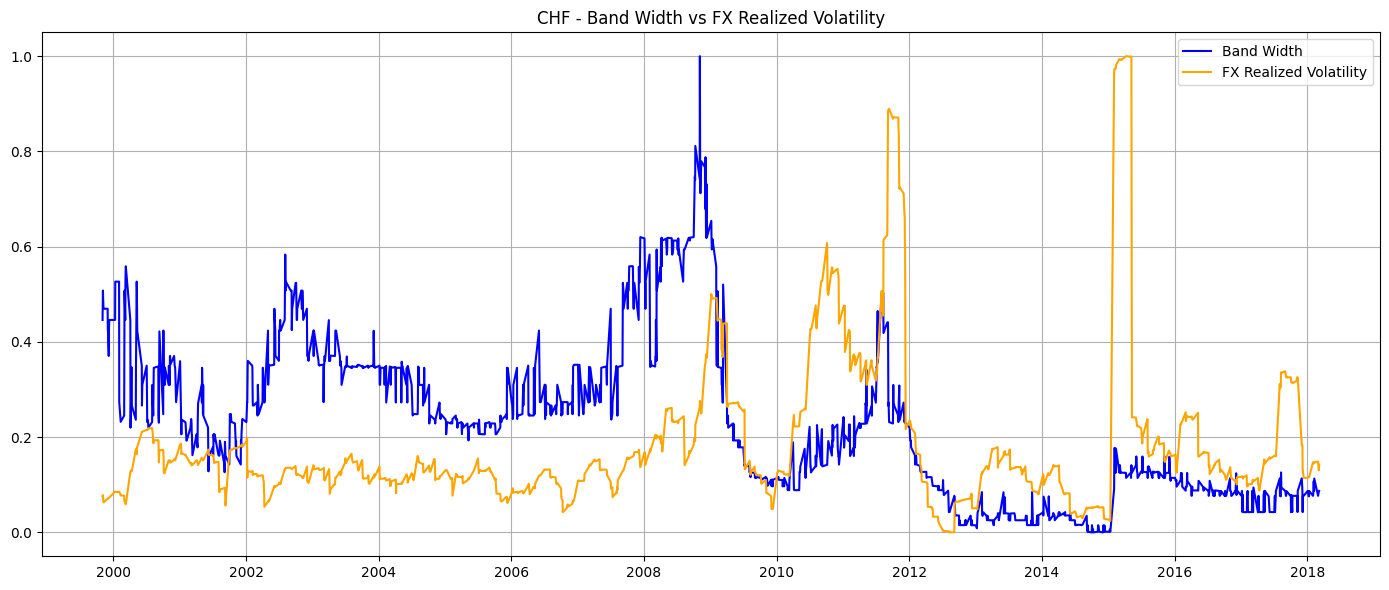

Final combined data2_clean head with all currencies:
            Band_Width_usd  Band_Width_scaled_usd  CIP_Stress_usd  \
Date                                                                
1999-07-07        3.548066               0.002438        3.608535   
1999-07-12        3.550400               0.004185        3.640145   
1999-08-02        3.549218               0.003300        3.686099   
1999-08-03        3.547218               0.001804        3.723850   
1999-08-04        3.552002               0.005383        3.683658   

            CIP_Stress_Log_usd  FX_RealizedVol_scaled_usd  Band_Width_gbp  \
Date                                                                        
1999-07-07            1.527910                        NaN        3.184495   
1999-07-12            1.534746                        NaN        3.270104   
1999-08-02            1.544600                        NaN        3.237289   
1999-08-03            1.552624                        NaN        3.141331   
1

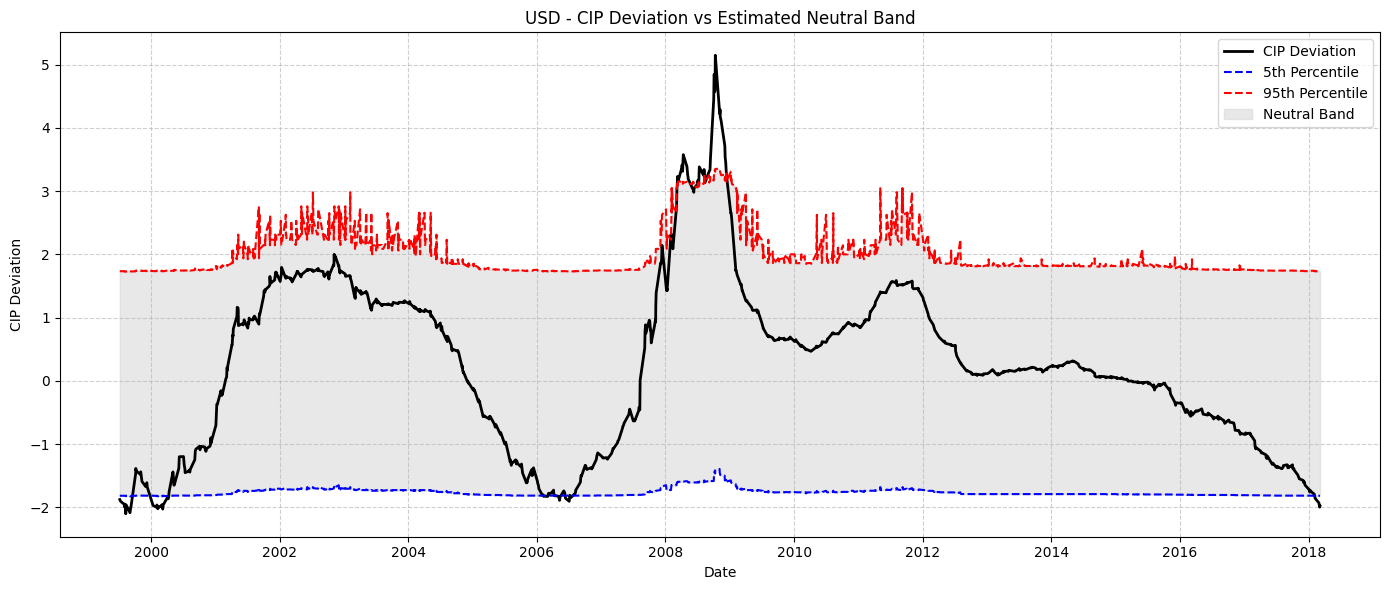

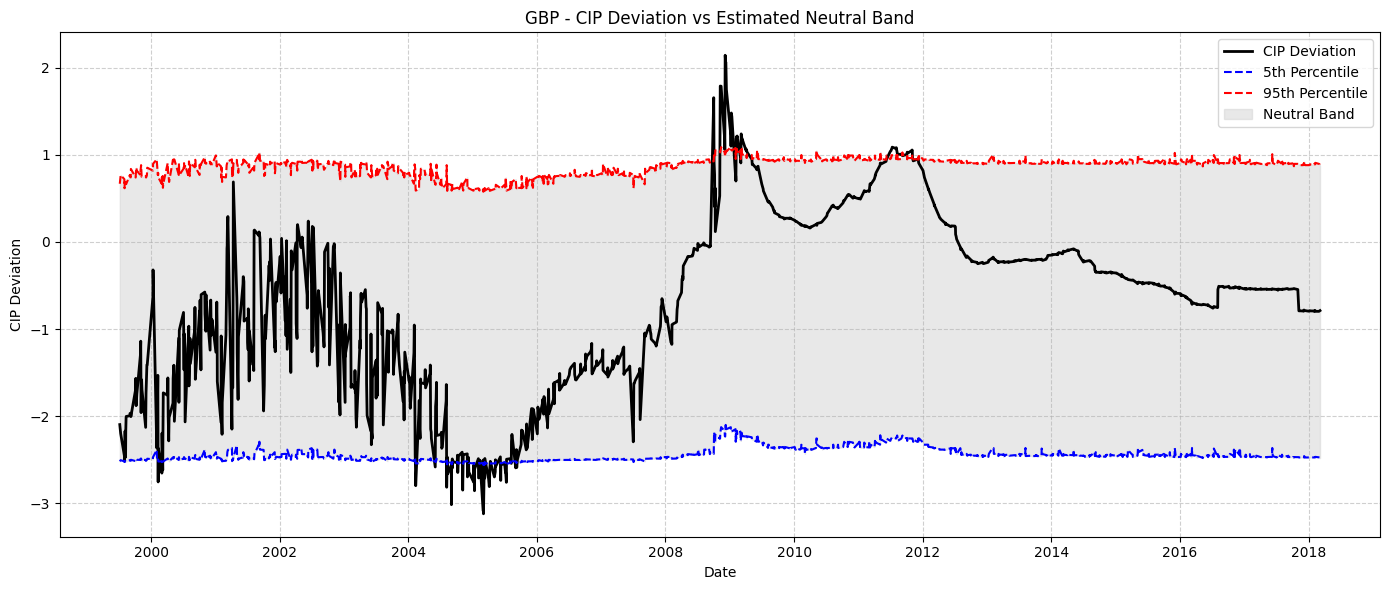

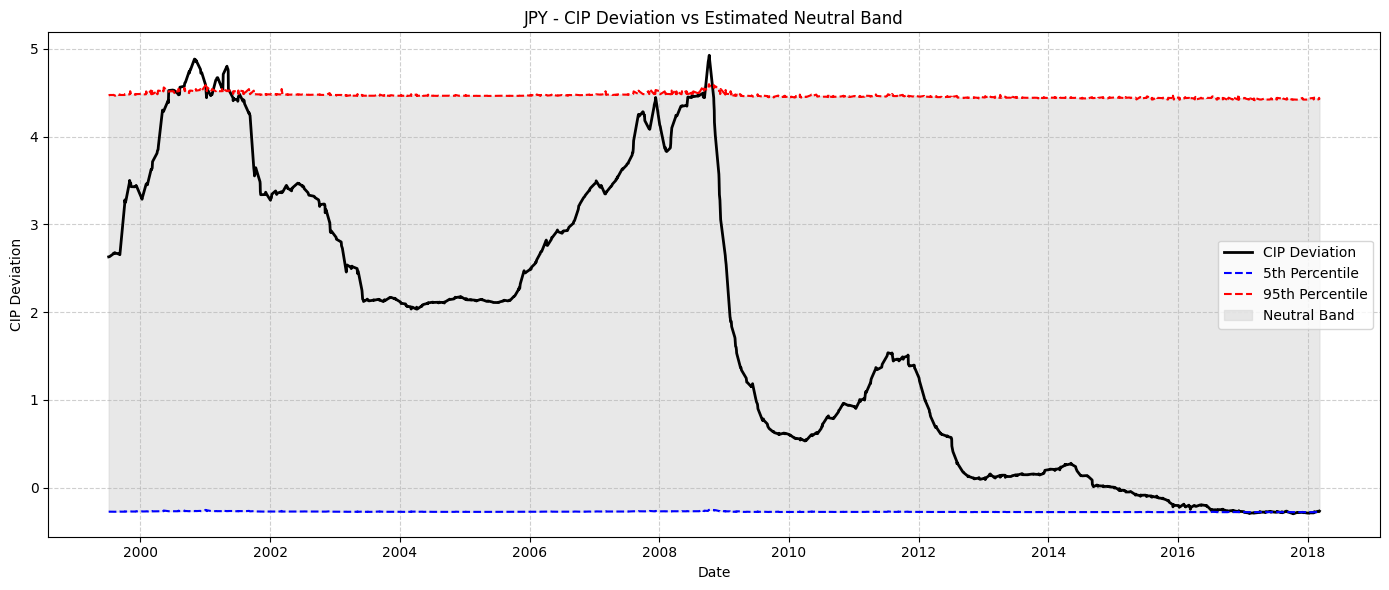

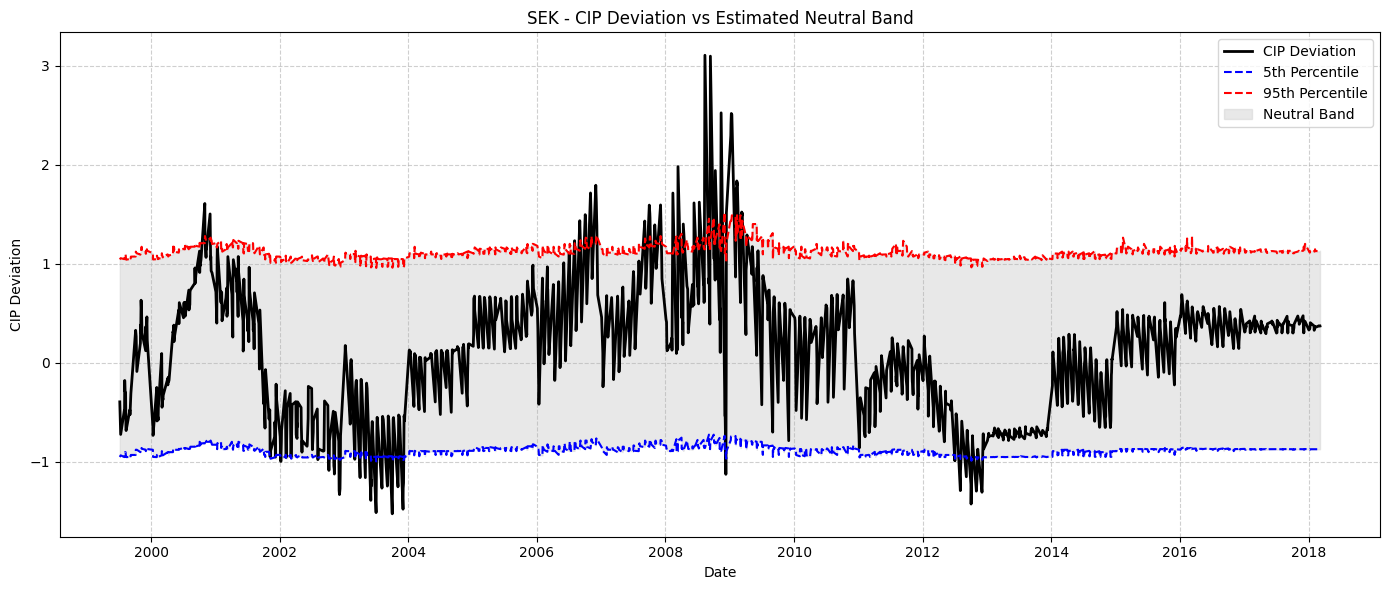

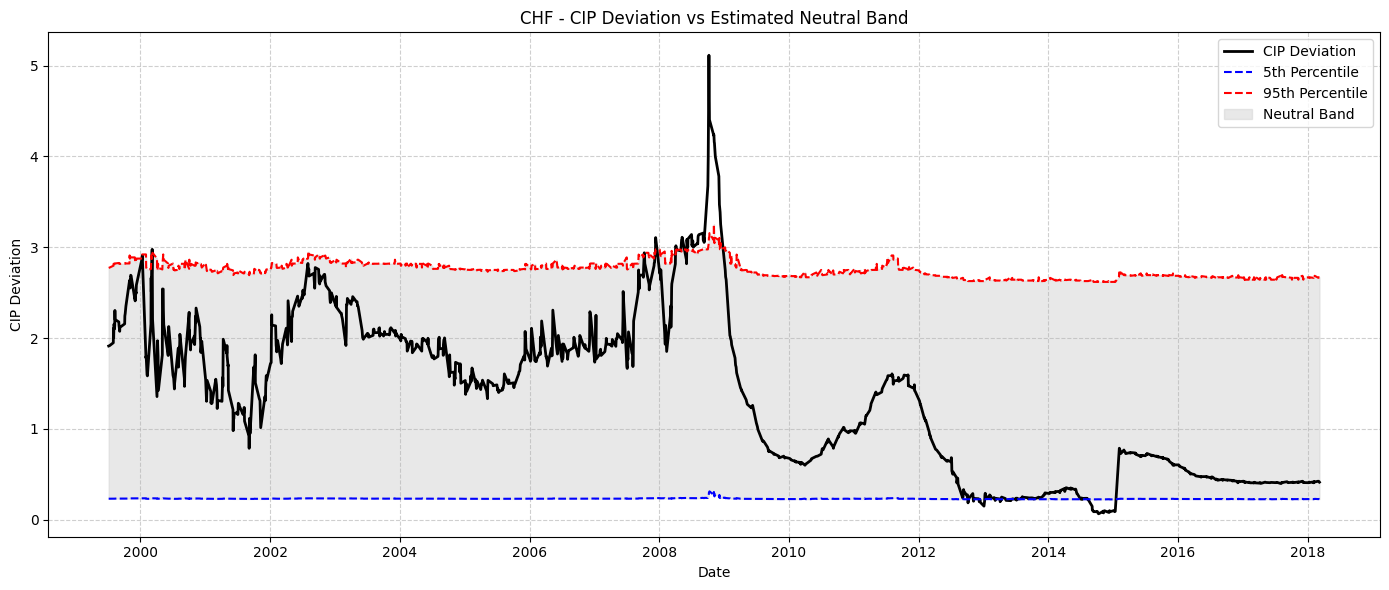

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt

# Define Currencies
currencies = {
    "usd": {"x": "x_usd", "trading_cost": "TradingCost_usd", "spot": "USD"},
    "gbp": {"x": "x_gbp", "trading_cost": "TradingCost_gbp", "spot": "GBP"},
    "jpy": {"x": "x_jpy", "trading_cost": "TradingCost_jpy", "spot": "JPY"},
    "sek": {"x": "x_sek", "trading_cost": "TradingCost_sek", "spot": "SEK"},
    "chf": {"x": "x_chf", "trading_cost": "TradingCost_chf", "spot": "CHF"},
}

def gaussian_kernel(dist, h):
    return np.exp(-0.5 * (dist / h)**2)

def kernel_quantile_estimate(X_train, y_train, X_pred, tau, h, kernel_func):
    dists = cdist(X_pred, X_train)
    weights = kernel_func(dists, h)
    quantiles = []
    for i in range(weights.shape[0]):
        w = weights[i]
        if np.all(w == 0) or np.isnan(w).any():
            quantiles.append(np.nan)
            continue
        sorted_idx = np.argsort(y_train)
        y_sorted = y_train[sorted_idx]
        w_sorted = w[sorted_idx]
        w_cumsum = np.cumsum(w_sorted)
        if w_cumsum[-1] == 0:
            quantiles.append(np.nan)
            continue
        w_cumsum /= w_cumsum[-1]
        idx = np.searchsorted(w_cumsum, tau)
        q_value = y_sorted[min(idx, len(y_sorted) - 1)]
        quantiles.append(float(q_value))
    return np.array(quantiles)

def min_max_scale(series):
    return (series - series.min()) / (series.max() - series.min())

# Sort and reset merged (your base DF)
merged = merged.sort_values("Date").reset_index(drop=True)

# Create lag columns for all currencies
for curr, params in currencies.items():
    merged[f"{params['x']}_lag_1"] = merged[params["x"]].shift(1)

results = {}
data2_clean_all = None  # This will hold merged data with all currencies’ bandwidth

for curr, params in currencies.items():
    print(f"\n\n====== Processing: {curr.upper()} ======\n")

    x_col = params["x"]
    cost_col = params["trading_cost"]
    spot_col = params["spot"]
    lag_col = f"{x_col}_lag_1"

    data = merged.copy().dropna(subset=[x_col, cost_col, lag_col])

    # Winsorize trading cost
    data[cost_col] = winsorize(data[cost_col].values, limits=[0.01, 0.01])

    # Macro features + PCA
    block_cols = ["bond_block", "equity_block", "fin_block", "money_block"]
    macro_features = [lag_col] + [col for col in block_cols if col in data.columns]
    X_macro = StandardScaler().fit_transform(data[macro_features])
    X_pca = PCA(n_components=0.95).fit_transform(X_macro)

    y = data[x_col].values
    tc_scaled = StandardScaler().fit_transform(data[cost_col].values.reshape(-1, 1))
    mask = ~(np.isnan(X_macro).any(axis=1) | np.isnan(tc_scaled).any(axis=1) | np.isnan(y))
    X_final = np.hstack([X_pca, tc_scaled])[mask]
    y_clean = y[mask]
    data2_clean = data.loc[mask].reset_index(drop=True)

    X_final_scaled = StandardScaler().fit_transform(X_final)

    # Quantile estimates
    for tau in [0.05, 0.95]:
        print(f"Estimating τ = {tau}")
        data2_clean[f"Q{tau*100:.1f}"] = kernel_quantile_estimate(
            X_final_scaled, y_clean, X_final_scaled, tau, 3, gaussian_kernel
        )

    data2_clean = data2_clean.dropna(subset=["Q95.0", "Q5.0"])
    data2_clean["Band_Width"] = (data2_clean["Q95.0"] - data2_clean["Q5.0"]).clip(lower=1e-4)

    eps = 1e-6
    data2_clean["CIP_Stress"] = np.where(
        (y_clean < (data2_clean["Q5.0"] - eps)) | (y_clean > (data2_clean["Q95.0"] + eps)),
        np.maximum(np.abs(y_clean - data2_clean["Q5.0"]), np.abs(y_clean - data2_clean["Q95.0"])),
        0
    )
    data2_clean["CIP_Stress_Log"] = np.log1p(data2_clean["CIP_Stress"])

    data2_clean["Date"] = pd.to_datetime(data2_clean["Date"], errors='coerce')
    data2_clean = data2_clean.set_index("Date")

    spot_rate = data2_clean[spot_col].dropna()
    data2_clean["Log_Returns"] = np.log(spot_rate / spot_rate.shift(1))
    data2_clean["Rolling_Volatility"] = data2_clean["Log_Returns"].rolling(20).std() * np.sqrt(252)

    data2_clean["Band_Width_scaled"] = min_max_scale(data2_clean["Band_Width"])
    data2_clean["FX_RealizedVol_scaled"] = min_max_scale(data2_clean["Rolling_Volatility"])

    comp_data = data2_clean.dropna(subset=["Band_Width_scaled", "FX_RealizedVol_scaled"])

    # Cointegration test
    coint_stat, p_value, _ = coint(comp_data["FX_RealizedVol_scaled"], comp_data["Band_Width_scaled"])
    print(f"Cointegration test p-value: {p_value:.4f}")

    if p_value > 0.15:
        print("=> No cointegration. Using first differences.")
        comp_data["BW"] = comp_data["Band_Width_scaled"].diff()
        comp_data["VOL"] = comp_data["FX_RealizedVol_scaled"].diff()
    else:
        print("=> Cointegrated. Using levels.")
        comp_data["BW"] = comp_data["Band_Width_scaled"]
        comp_data["VOL"] = comp_data["FX_RealizedVol_scaled"]

    comp_data = comp_data.dropna(subset=["BW", "VOL"])

    X = sm.add_constant(comp_data["BW"])
    y = comp_data["VOL"]
    model = sm.OLS(y, X).fit()
    print(model.summary())

    results[curr] = {"data": data2_clean, "model": model}

    # Prepare columns with currency suffix
    currency_suffix = f"_{curr}"
    cols_to_merge = ["Band_Width", "Band_Width_scaled", "CIP_Stress", "CIP_Stress_Log", "FX_RealizedVol_scaled"]

    data_to_merge = data2_clean[cols_to_merge].copy()
    data_to_merge.columns = [col + currency_suffix for col in cols_to_merge]

    # Merge into global data2_clean_all on index=Date
    if data2_clean_all is None:
        data2_clean_all = data_to_merge
    else:
        data2_clean_all = data2_clean_all.join(data_to_merge, how='outer')

    # Plot Band Width vs Volatility
    plt.figure(figsize=(14,6))
    plt.plot(comp_data.index, comp_data["Band_Width_scaled"], label="Band Width", color="blue")
    plt.plot(comp_data.index, comp_data["FX_RealizedVol_scaled"], label="FX Realized Volatility", color="orange")
    plt.title(f"{curr.upper()} - Band Width vs FX Realized Volatility")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Assign combined dataframe back to data2_clean (optional)
data2_clean = data2_clean_all.copy()

print("Final combined data2_clean head with all currencies:")
print(data2_clean.head())

# Optional: Plot CIP deviation and neutral band for each currency
for curr, result in results.items():
    df = result["data"].copy()
    x_col = currencies[curr]["x"]

    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df[x_col], label="CIP Deviation", color="black", linewidth=2)
    plt.plot(df.index, df["Q5.0"], label="5th Percentile", color="blue", linestyle="--")
    plt.plot(df.index, df["Q95.0"], label="95th Percentile", color="red", linestyle="--")
    plt.fill_between(df.index, df["Q5.0"], df["Q95.0"], color="lightgray", alpha=0.5, label="Neutral Band")

    plt.title(f"{curr.upper()} - CIP Deviation vs Estimated Neutral Band")
    plt.xlabel("Date")
    plt.ylabel("CIP Deviation")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


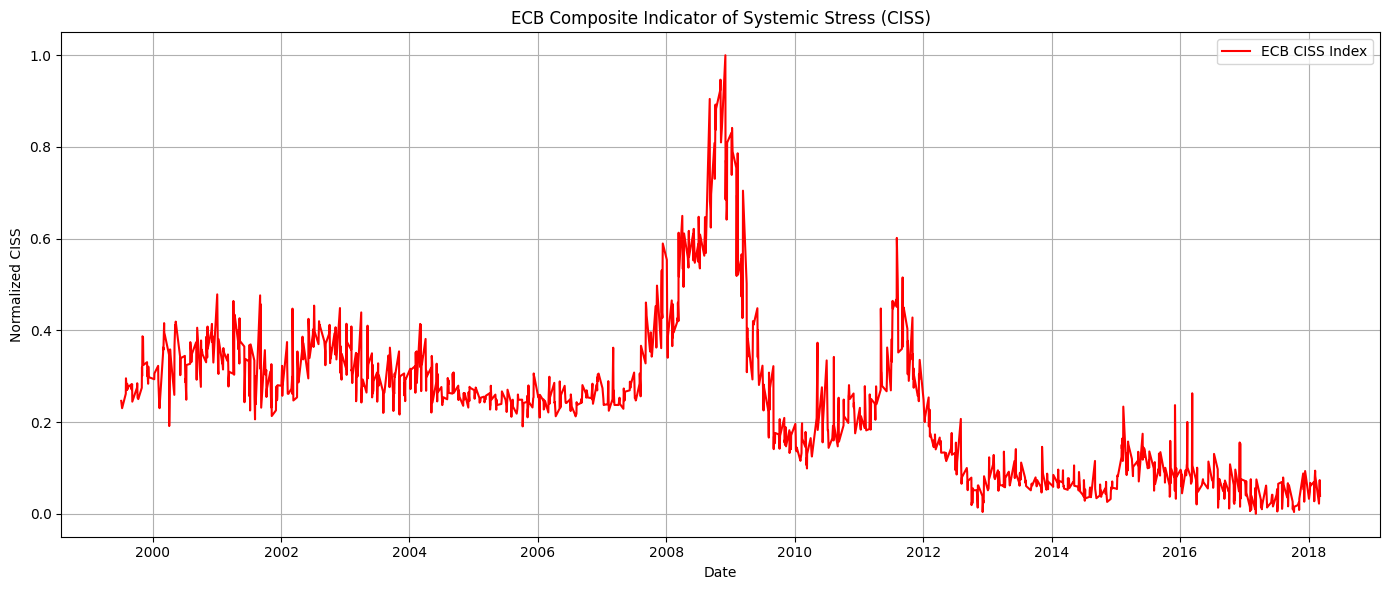

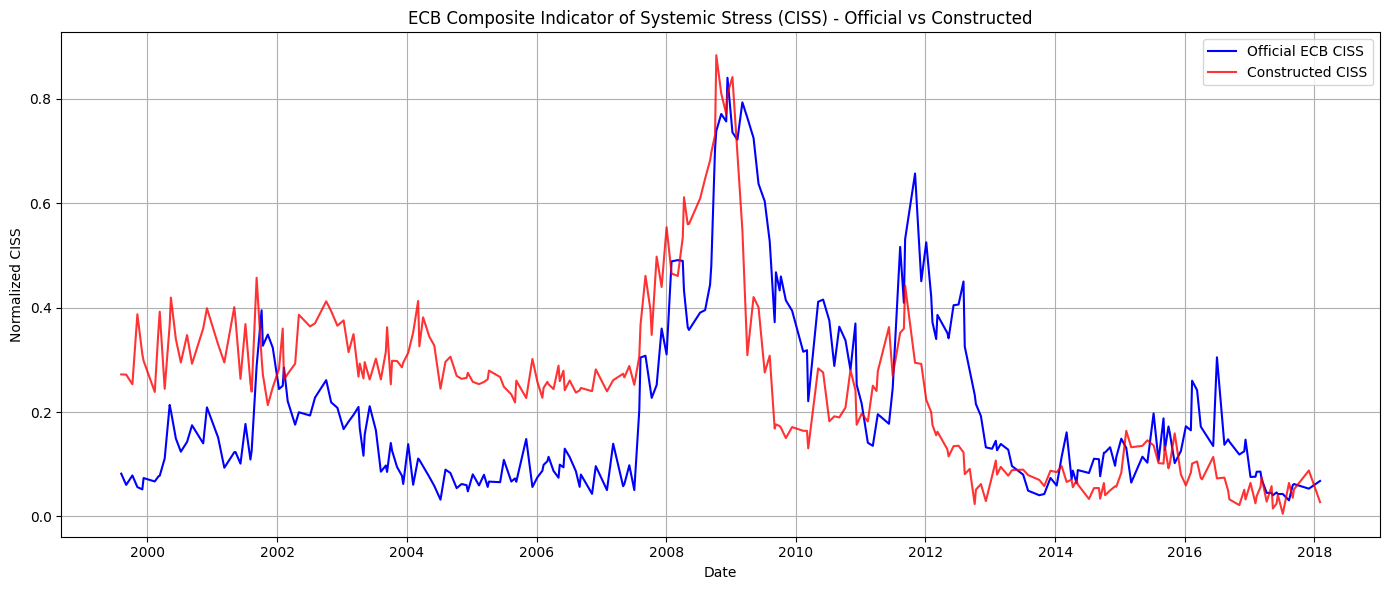

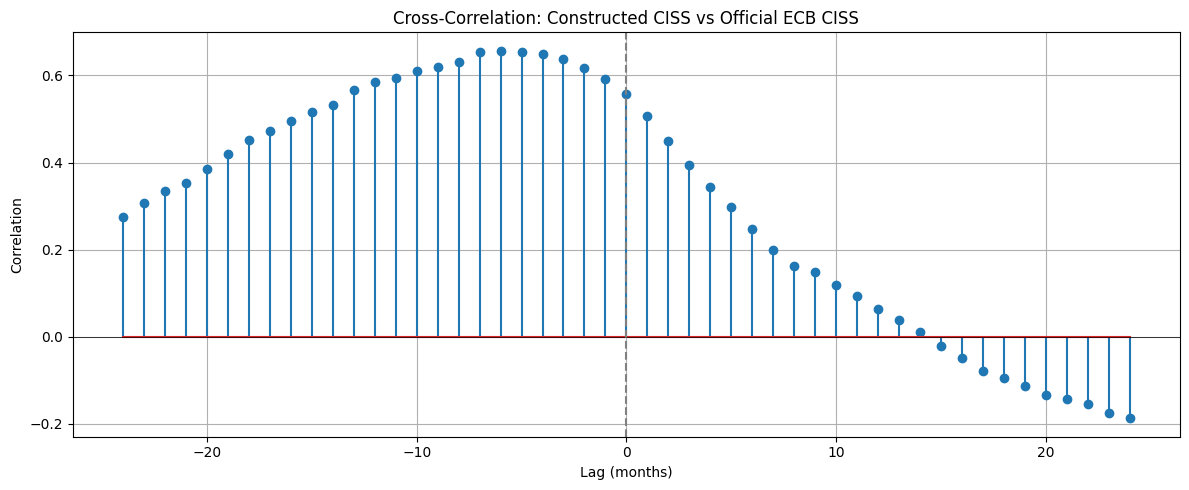

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# --- Step 1: Prepare the FX block by combining scaled bandwidths from all currencies ---

# Assume data2_clean is your combined DataFrame with these columns:
# 'Band_Width_scaled_usd', 'Band_Width_scaled_gbp', 'Band_Width_scaled_jpy', 'Band_Width_scaled_sek', 'Band_Width_scaled_chf'

fx_cols = [
    "Band_Width_scaled_usd",
    "Band_Width_scaled_gbp",
    "Band_Width_scaled_jpy",
    "Band_Width_scaled_sek",
    "Band_Width_scaled_chf",
]

# Check columns exist
fx_cols = [col for col in fx_cols if col in data2_clean.columns]

# Drop rows with missing FX bandwidth data to ensure clean input for PCA
fx_data = data2_clean[fx_cols].dropna()

# Standardize FX block components (mean 0, std 1)
scaler_fx = StandardScaler()
fx_scaled = scaler_fx.fit_transform(fx_data)

# Apply PCA on FX scaled data and take first principal component as FX block score
pca_fx = PCA(n_components=1)
fx_block_scores = pca_fx.fit_transform(fx_scaled).flatten()

# Insert FX block score back into data2_clean aligned by index
fx_block_series = pd.Series(fx_block_scores, index=fx_data.index, name="fx_block")

# Add the fx_block to your main DataFrame (aligning on index)
data2_clean = data2_clean.join(fx_block_series, how='left')

# --- Step 2: Prepare other blocks ---

# List all block columns expected in data2_clean (except fx_block just created)
# Make sure these blocks exist in your DataFrame
other_blocks = ["money_block", "bond_block", "equity_block", "fin_block"]

# Filter to those columns existing in data2_clean
other_blocks = [col for col in other_blocks if col in data2_clean.columns]

# Subset dataframe for blocks + fx_block and drop rows with missing data
blocks_df = data2_clean[other_blocks + ["fx_block"]].dropna()

# Standardize all blocks (mean 0, std 1)
scaler_blocks = StandardScaler()
blocks_scaled = scaler_blocks.fit_transform(blocks_df)

# --- Step 3: Compute CISS according to official ECB methodology ---

# Covariance matrix of standardized blocks
cov_matrix = np.cov(blocks_scaled.T)

# PCA on covariance matrix
pca = PCA(n_components=1)
# Fit PCA on covariance matrix by trick: eigen decomposition of covariance matrix
# We can just use pca.fit(blocks_scaled), first PC explains systemic risk
ciss_scores = pca.fit_transform(blocks_scaled).flatten()

# Normalize CISS to [0,1]
ciss_min, ciss_max = ciss_scores.min(), ciss_scores.max()
ciss_norm = (ciss_scores - ciss_min) / (ciss_max - ciss_min)

# Create final CISS Series aligned with blocks_df index
ciss_series = pd.Series(ciss_norm, index=blocks_df.index, name="CISS")

# Join CISS back to data2_clean
data2_clean = data2_clean.join(ciss_series, how="left")

# --- Step 4: Plot the CISS index ---

plt.figure(figsize=(14,6))
plt.plot(data2_clean.index, data2_clean["CISS"], label="ECB CISS Index", color="red")
plt.title("ECB Composite Indicator of Systemic Stress (CISS)")
plt.xlabel("Date")
plt.ylabel("Normalized CISS")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Load official ECB CISS
official_ecb = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/ecb_ciss.xlsx", engine="openpyxl", header=1)
official_ecb["Date"] = pd.to_datetime(official_ecb["Date"], errors='coerce')
official_ecb = official_ecb.set_index("Date")

# Extract official CISS column (adjust column name if different)
official_ciss = official_ecb["ECB_CISS"]

# Align with your constructed CISS (assuming 'CISS' column exists in data2_clean)
comparison_df = pd.DataFrame({
    "Official ECB CISS": official_ciss,
    "Constructed CISS": data2_clean["CISS"]
}).dropna()

# Plot both on the same graph
plt.figure(figsize=(14,6))
plt.plot(comparison_df.index, comparison_df["Official ECB CISS"], label="Official ECB CISS", color="blue")
plt.plot(comparison_df.index, comparison_df["Constructed CISS"], label="Constructed CISS", color="red", alpha=0.8)
plt.title("ECB Composite Indicator of Systemic Stress (CISS) - Official vs Constructed")
plt.xlabel("Date")
plt.ylabel("Normalized CISS")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

from statsmodels.tsa.stattools import ccf

# Get the two series as NumPy arrays
official = comparison_df["Official ECB CISS"] - comparison_df["Official ECB CISS"].mean()
constructed = comparison_df["Constructed CISS"] - comparison_df["Constructed CISS"].mean()

# Define a max lag (e.g., 24 months)
max_lag = 24
lags = np.arange(-max_lag, max_lag + 1)

# Calculate cross-correlation manually for negative lags
ccf_values = [constructed.shift(-lag).corr(official) for lag in lags]

# Plot cross-correlation
plt.figure(figsize=(12, 5))
plt.stem(lags, ccf_values)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--')
plt.title("Cross-Correlation: Constructed CISS vs Official ECB CISS")
plt.xlabel("Lag (months)")
plt.ylabel("Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Plotting Offical ECB CISS againt CISS calculated by reverse engineering in the previous code block

# Load ECB official CISS
ecb = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/ecb_ciss.xlsx", engine="openpyxl", header=1)

# Make sure 'Date' and 'CISS' columns exist and are clean
print("ECB Columns:", ecb.columns.tolist())  # Debug line

# Convert date column
ecb["Date"] = pd.to_datetime(ecb["Date"])

# Reset index of reconstructed CISS
df_ciss_reset = df_ciss.reset_index()

# Merge on 'Date'
combined = df_ciss_reset.merge(ecb[["Date", "ECB_CISS"]], on="Date", how="inner")

# Optional: Check how many rows were matched
print(f"Merged CISS shape: {combined.shape}")
# Normalize to [0, 1] based on max
combined['Normalized_CISS'] = combined['Reconstructed_CISS'] / combined['Reconstructed_CISS'].max()
combined.to_csv("combined.csv")
combined = pd.read_csv("combined.csv")
print(combined.head())

plt.figure(figsize=(12, 6))
plt.plot(combined["Date"], combined["Normalized_CISS"], label="Normalized_CISS", color="dodgerblue")
plt.plot(combined["Date"], combined["ECB_CISS"], label="Official ECB CISS", linestyle="--", color="orange")

plt.title("Comparison of Reconstructed vs ECB Official CISS")
plt.xlabel("Date")
plt.ylabel("CISS Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("CISS_Comparison.png")
plt.show()

ECB Columns: ['Date', 'TIME PERIOD', 'ECB_CISS']


NameError: name 'df_ciss' is not defined

In [ ]:
#Generating inputs for CISS through reverse engineering from CISS measure provided by ECB

weights = {
    "Bond": 0.20,
    "Equity": 0.35,
    "Intermediaries": 0.30,
    "FX": 0.15
}
ROLLING_WINDOW = 52
labels = list(weights.keys())
weight_vec = np.array([weights[l] for l in labels])
# === 1. LOAD CONTRIBUTIONS FROM .XLSX FILES ===
def load_contrib_excel(file, name, weight):
    df = pd.read_excel(file, engine="openpyxl", header=1)
    df.columns = [col.strip() for col in df.columns]

    # Detect and rename 'Date' column
    if "Date" not in df.columns:
        if "TIME PERIOD" in df.columns:
            df.rename(columns={"TIME PERIOD": "Date"}, inplace=True)
        else:
            raise ValueError(f"No date column found in {file}")

    # Parse date
    df["Date"] = pd.to_datetime(df["Date"])

    # Rename contribution column (we expect it to be named like 'Bond', 'Equity', etc.)
    df.rename(columns={name: f"{name}_Contrib"}, inplace=True)

    # Convert to numeric (handles any stray text or symbols)
    df[f"{name}_Contrib"] = pd.to_numeric(df[f"{name}_Contrib"], errors="coerce")

    # Invert contribution to estimate subindex using sqrt(contribution / weight²)
    df[f"{name}_Input"] = np.sqrt((df[f"{name}_Contrib"] / df[f"{name}_Contrib"].sum()) / (weight ** 2))

    # Return cleaned columns
    return df[["Date", f"{name}_Input"]]

# Load all contribution files
bond = load_contrib_excel("/content/drive/MyDrive/Colab Notebooks/bond.xlsx", "Bond", weights["Bond"])
equity = load_contrib_excel("/content/drive/MyDrive/Colab Notebooks/equity.xlsx", "Equity", weights["Equity"])
intermediaries = load_contrib_excel("/content/drive/MyDrive/Colab Notebooks/intermediaries.xlsx", "Intermediaries", weights["Intermediaries"])
fx = load_contrib_excel("/content/drive/MyDrive/Colab Notebooks/fx.xlsx", "FX", weights["FX"])

# Merge subindices
sub_df = bond.merge(equity, on="Date") \
             .merge(intermediaries, on="Date") \
             .merge(fx, on="Date")
sub_df.set_index("Date", inplace=True)

# === 2. CALCULATE ROLLING CISS & SAVE CORRELATIONS ===
ciss_vals = []
ciss_dates = []
corr_records = []

for t in range(ROLLING_WINDOW, len(sub_df)):
    s_t = sub_df.iloc[t].values
    C_t = sub_df.iloc[t - ROLLING_WINDOW:t].corr().values
    y_t = weight_vec * s_t
    ciss_val = np.dot(y_t, np.dot(C_t, y_t))
    ciss_vals.append(ciss_val)
    ciss_dates.append(sub_df.index[t])

    # Save correlation matrix (flattened)
    corr_record = {"Date": sub_df.index[t]}
    for i in range(4):
        for j in range(4):
            corr_record[f"{labels[i]}_{labels[j]}"] = C_t[i, j]
    corr_records.append(corr_record)

# === 3. BUILD AND SAVE OUTPUTS ===
# CISS series
df_ciss = pd.DataFrame({
    "Date": ciss_dates,
    "Reconstructed_CISS": ciss_vals
}).set_index("Date")
df_ciss.to_csv("reconstructed_ciss.csv")
reconstructed_ciss = pd.read_csv("reconstructed_ciss.csv")
print(df_ciss.head())

# Inverted subindices
sub_df.to_csv("inverted_subindices.csv")
inverted_subindices = pd.read_csv("inverted_subindices.csv")
print(sub_df.head())

# Correlation matrices
corr_df = pd.DataFrame(corr_records)
corr_df.to_csv("reconstructed_correlation_matrices.csv", index=False)
print(corr_df.head())

print("Saved: reconstructed_ciss.csv, inverted_subindices.csv, reconstructed_correlation_matrices.csv")




In [ ]:
#Creating a single data file now and calling it 'data'

merged['Date'] = pd.to_datetime(merged['Date'])
inverted_subindices['Date'] = pd.to_datetime(inverted_subindices['Date'])
reconstructed_ciss['Date'] = pd.to_datetime(reconstructed_ciss['Date'])
combined['Date'] = pd.to_datetime(combined['Date'])
data = merged.merge(inverted_subindices, on='Date') \
               .merge(reconstructed_ciss, on='Date') \
               .merge(combined, on='Date')
data = data.dropna().copy()
print(data.head())

In [ ]:
#Create lag features (1-period)
# -------------------------------
data["x_lag_1"] = data["x"].shift(1)
data.dropna(inplace=True)

# -------------------------------
# PCA on macroeconomic input features
# -------------------------------
macro_features = ["x_lag_1", "Bond_Input", "Equity_Input", "FX_Input", "Intermediaries_Input"]
X_macro = data[macro_features].values

# Standardize macro features
scaler_macro = StandardScaler()
X_macro_scaled = scaler_macro.fit_transform(X_macro)

# Optimal PCA: Choose # components to explain ~95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_macro_scaled)

print(f"PCA Components: {X_pca.shape[1]}")
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# -------------------------------
# Add trading cost as separate conditioning variable
# -------------------------------
trading_cost = data["TradingCost"].values.reshape(-1, 1)

# Concatenate PCA features + trading cost
X_final = np.hstack([X_pca, trading_cost])

# Standardize entire input space (optional but better for kernel scale)
scaler_final = StandardScaler()
X_final_scaled = scaler_final.fit_transform(X_final)

# Output variable
y = data["x"].values





In [ ]:
#Kernel weighted Quantile Regression for estimating the 'neutral band', and calculating CIP stress measure

# -------------------------------

def gaussian_kernel(dist, h):
    return np.exp(-0.5 * (dist / h)**2)

def kernel_quantile_estimate(X_train, y_train, X_pred, tau, h, kernel_func):
    dists = cdist(X_pred, X_train)
    weights = kernel_func(dists, h)
    quantiles = []
    for i in range(weights.shape[0]):
        w = weights[i]
        if np.all(w == 0) or np.isnan(w).any():
            quantiles.append(np.nan)
            continue
        sorted_idx = np.argsort(y_train)
        y_sorted = y_train[sorted_idx]
        w_sorted = w[sorted_idx]
        w_cumsum = np.cumsum(w_sorted)
        if w_cumsum[-1] == 0:
            quantiles.append(np.nan)
            continue
        w_cumsum /= w_cumsum[-1]
        idx = np.searchsorted(w_cumsum, tau)
        q_value = y_sorted[min(idx, len(y_sorted) - 1)]
        quantiles.append(float(q_value))
    return np.array(quantiles)

# Estimate upper and lower bands
taus = [0.05, 0.95]
h_opt = 5  # Bandwidth

for tau in taus:
    print(f"Estimating τ = {tau}")
    data[f"Q{tau*100:.1f}"] = kernel_quantile_estimate(X_final_scaled, y, X_final_scaled, tau, h_opt, gaussian_kernel)

# -------------------------------
# 7. Estimate Neutral Band & Stress
# -------------------------------

data["Band_Width"] = data["Q95.0"] - data["Q5.0"]


# Compute CIP stress: deviation outside the neutral band
# Ensure equal lengths — use the smallest length among them
n = min(len(X_final_scaled), len(y), len(data))
X_final_scaled = X_final_scaled[:n]
y = y[:n]
data = data.iloc[:n].reset_index(drop=True)

# Convert y to NumPy for elementwise ops

y_vals = y

eps = 1e-6

data["CIP_Stress"] = np.where(
    (y_vals < (data["Q5.0"] - eps)) | (y_vals > (data["Q95.0"] + eps)),
    np.maximum(np.abs(y_vals - data["Q5.0"]), np.abs(y_vals - data["Q95.0"])),
    0
)
data["CIP_Stress_Log"] = np.log1p(data["CIP_Stress"])


#Save file with results
data.to_csv("data_withresults.csv", index=False)
data_withresults = pd.read_csv("data_withresults.csv")
print(data_withresults.head())

non_zero_pct = (data["CIP_Stress"] > 0).mean() * 100
print(f"CIP Stress is non-zero {non_zero_pct:.2f}% of the time.")



In [ ]:
#Plots
#Plot the neutral band with original x

# -------------------------------

plt.figure(figsize=(12, 5))
plt.plot(data.index, y, label="CIP Deviation", color="blue")
plt.plot(data.index, data["Q5.0"], label="Q5 (lower band)", color="green", linestyle="--")
plt.plot(data.index, data["Q95.0"], label="Q95 (upper band)", color="red", linestyle="--")
plt.fill_between(data.index, data["Q5.0"], data["Q95.0"], color="orange", alpha=0.2)
plt.title("CIP Deviation and Neutral Band (Conditioned on Trading Cost)")
plt.legend()
plt.tight_layout()
plt.show()

#Faceted log stress plots
sns.set(style="whitegrid")
year_bins = [(2000, 2005), (2006, 2010), (2011, 2015), (2016, 2020), (2021, 2025)]
fig, axes = plt.subplots(len(year_bins), 1, figsize=(14, 12), sharey=True)

for i, (start, end) in enumerate(year_bins):
    ax = axes[i]
    data_withresults["Date"] = pd.to_datetime(data_withresults["Date"])
    mask = (data_withresults["Date"].dt.year >= start) & (data_withresults["Date"].dt.year <= end)
    ax.plot(data_withresults["Date"][mask], data_withresults["CIP_Stress_Log"][mask], color="darkred", linewidth=1.5)
    ax.set_title(f"Log CIP Stress ({start}–{end})", fontsize=12)
    ax.grid(True, linestyle="--")

axes[-1].set_xlabel("Date")
fig.supylabel("Log(CIP Stress + 1)")
plt.tight_layout()
plt.savefig("CIP_Stress_Log_Faceted.png", dpi=300, transparent=True)
plt.show()

#Faceted stress plots
sns.set(style="whitegrid")
year_bins = [(2000, 2005), (2006, 2010), (2011, 2015), (2016, 2020), (2021, 2025)]
fig, axes = plt.subplots(len(year_bins), 1, figsize=(14, 12), sharey=True)

for i, (start, end) in enumerate(year_bins):
    ax = axes[i]
    data_withresults["Date"] = pd.to_datetime(data_withresults["Date"])
    mask = (data_withresults["Date"].dt.year >= start) & (data_withresults["Date"].dt.year <= end)
    ax.plot(data_withresults["Date"][mask], data_withresults["CIP_Stress"][mask], color="darkred", linewidth=1.5)
    ax.set_title(f"CIP Stress ({start}–{end})", fontsize=12)
    ax.grid(True, linestyle="--")

axes[-1].set_xlabel("Date")
fig.supylabel("CIP Stress")
plt.tight_layout()
plt.savefig("CIP_Stress_Faceted.png", dpi=300, transparent=True)
plt.show()

# Ensure Date column is datetime
data_withresults["Date"] = pd.to_datetime(data_withresults["Date"])

# Set Date as index
data_withresults.set_index("Date", inplace=True)

# Just to be sure — filter out any rows before 2000
data_withresults = data_withresults[data_withresults.index >= "2000-01-01"]

# Define key crisis periods
crisis_periods = [
    ('2008 Crisis', '2008-09-01', '2009-03-01'),
    ('2011 Eurozone', '2011-07-01', '2012-01-01'),
    ('2015 CHF Shock', '2015-01-15', '2015-02-28'),
    ('2020 COVID', '2020-02-01', '2020-04-30'),
    ('2022 Ukraine War', '2022-02-01', '2022-05-31'),
]

# Plot
plt.figure(figsize=(12,6))
plt.plot(data_withresults.index, data_withresults["Band_Width"], label='Band Width', color='navy')

# Add shaded crisis periods
for label, start, end in crisis_periods:
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='red', alpha=0.2, label=label)

# Avoid duplicate legend entries
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
plt.legend(unique.values(), unique.keys(), loc='upper left')

plt.title('Band Width vs Known Crisis Events')
plt.ylabel('Band Width')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

data_withresults = data_withresults.reset_index()

print(data_withresults.head())


In [ ]:
#Checking Stationarity and transforming variables where necessary
def check_stationarity(series, name):
    result = adfuller(series.dropna())
    print(f"ADF Test for {name}:")
    print(f"  Test Statistic = {result[0]:.4f}")
    print(f"  p-value = {result[1]:.4f}")
    print("  Stationary" if result[1] < 0.05 else "  Non-stationary")
    print("")

check_stationarity(data_withresults["ECB_CISS"], "ECB_CISS")
check_stationarity(data_withresults["Band_Width"], "Band_Width")
check_stationarity(data_withresults["GDP_growth"], "GDP_growth")
check_stationarity(data_withresults["Bond_Input"], "Bond_Input")
check_stationarity(data_withresults["Equity_Input"], "Equity_Input")
check_stationarity(data_withresults["FX_Input"], "FX_Input")
check_stationarity(data_withresults["Intermediaries_Input"], "Intermediaries_Input")

# Save current data
data_withresults.to_csv("data_withresults.csv", index=False)

# Reload cleanly
data_withresults = pd.read_csv("data_withresults.csv")

# Apply differencing AFTER loading
data_withresults["ECB_CISS_diff"] = data_withresults["ECB_CISS"].diff()
data_withresults["GDP_growth_diff"] = data_withresults["GDP_growth"].diff()
data_withresults["Intermediaries_Input_diff"] = data_withresults["Intermediaries_Input"].diff()

# Drop NA rows if needed
data_withresults.dropna(subset=["ECB_CISS_diff", "GDP_growth_diff", "Intermediaries_Input_diff"], inplace=True)

# Save current data
data_withresults.to_csv("data_withresults.csv", index=False)

# Now check stationarity
check_stationarity(data_withresults["ECB_CISS_diff"], "ECB_CISS_diff")
check_stationarity(data_withresults["GDP_growth_diff"], "GDP_growth_diff")
check_stationarity(data_withresults["Intermediaries_Input_diff"], "Intermediaries_Input_diff")

In [ ]:
#Checking for multicollinaerity
features = ["Band_Width", "Bond_Input", "Equity_Input", "FX_Input", "Intermediaries_Input_diff"]
X = add_constant(data_withresults[features].dropna())
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("VIF Results:")
for i, var in enumerate(X.columns):
    print(f"{var}: {vifs[i]:.2f}")

In [ ]:
# Level OLS Regression
import statsmodels.api as sm
df_reg = pd.read_csv("data_withresults.csv", parse_dates=["Date"])
X_vars = ["Band_Width", "Bond_Input", "Equity_Input", "FX_Input", "Intermediaries_Input_diff"]
X = df_reg[X_vars]
X = sm.add_constant(X)  # Adds intercept
y = df_reg["ECB_CISS_diff"]

model = sm.OLS(y, X, missing='drop').fit()
print(model.summary())

df_reg = pd.read_csv("data_withresults.csv", parse_dates=["Date"])
X_vars = ["Band_Width"]
X = df_reg[X_vars]
X = sm.add_constant(X)  # Adds intercept
y = df_reg["ECB_CISS_diff"]

model = sm.OLS(y, X, missing='drop').fit()
print(model.summary())

In [ ]:
# VAR Model to regress GDP Growth on CISS

# Function to check stationarity and difference if necessary
def adf_test(series):
    result = adfuller(series.dropna())
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("The series is stationary.")
        return False  # Already stationary
    else:
        print("The series is non-stationary. Differencing is required.")
        return True  # Needs differencing

def difference_series(series):
    """Differencing the series to make it stationary."""
    return series.diff().dropna()

# Step 1: Check for stationarity and difference if necessary for ARIMA & VAR
def make_stationary(data_withresults, columns):
    for col in columns:
        if adf_test(data_withresults[col]):
            data_withresults[col] = difference_series(data_withresults[col])
    return data_withresults

# Check stationarity and difference the necessary columns
data_withresults = make_stationary(data_withresults, ["GDP_growth_diff", "ECB_CISS_diff", "Band_Width"])


max_lags = 10
significant_lags = []

df_diff = data_withresults[["GDP_growth_diff", "ECB_CISS_diff"]].dropna()

for lag in range(1, max_lags + 1):
    model = VAR(df_diff)
    results = model.fit(lag)
    print(f"\n--- VAR({lag}) ---")
    print(results.summary())

    # Check if any cross-lagged coefficients are significant
    gdp_eq = results.params.filter(like='GDP_growth_diff')
    ciss_eq = results.params.filter(like='ECB_CISS_diff')

    # You could refine this to check p-values, not just coefficients
    if any(results.pvalues['GDP_growth_diff'].filter(like='CISS__') < 0.05):
        significant_lags.append(lag)

print("\nSignificant CISS lags affecting GDP_growth_diff found at lags:", significant_lags)

granger1 = results.test_causality('GDP_growth_diff', ['ECB_CISS_diff'], kind='f')
granger2 = results.test_causality('ECB_CISS_diff', ['GDP_growth_diff'], kind='f')
print("Does CISS cause GDP?")
print(granger1.summary())

print("\nDoes GDP cause CISS?")
print(granger2.summary())


In [ ]:
# VAR Model to regress GDP Growth on CISS and Bandwidth



max_lags = 10
significant_lags = []

# Assuming 'data_withresults' contains the necessary variables, and Band_Width_lag1 exists
df_diff = data_withresults[["GDP_growth_diff", "ECB_CISS_diff", "Band_Width"]].dropna()

# Loop through different lags and fit the VAR model
for lag in range(1, max_lags + 1):
    model = VAR(df_diff)
    results = model.fit(lag)
    print(f"\n--- VAR({lag}) ---")
    print(results.summary())

    # Check if any cross-lagged coefficients are significant
    # You can check the coefficients corresponding to the GDP and CISS
    gdp_eq = results.params.filter(like='GDP_growth_diff')
    ciss_eq = results.params.filter(like='ECB_CISS_diff')
    bandwidth_eq = results.params.filter(like='Band_Width')

    # Check if any CISS or Band_Width lags are significant for GDP
    if any(results.pvalues['GDP_growth_diff'].filter(like='CISS__') < 0.05) or \
       any(results.pvalues['GDP_growth_diff'].filter(like='Band_Width') < 0.05):
        significant_lags.append(lag)

print("\nSignificant lags affecting GDP_growth_diff found at lags:", significant_lags)

In [ ]:
# Checking VAR results for CISS inputs, bandwidth to CISS

df_lagged = data_withresults.copy()

# Reduce the number of lags to avoid potential multicollinearity
for col in ['Band_Width', 'Bond_Input', 'Equity_Input', 'FX_Input', 'Intermediaries_Input_diff']:
    for lag in range(1, 3):  # Reduced lags to 1 and 2
        df_lagged[f'{col}_lag{lag}'] = data_withresults[col].shift(lag)

# Drop rows with missing values due to lagging
df_lagged = df_lagged.dropna()
numerical_df = df_lagged.select_dtypes(include=['float64', 'int64'])
print(numerical_df.head())

numerical_df_no_date = numerical_df.drop(columns=['Year'])

# Fit the VAR model, excluding 'Date' column and using fewer lags
# Only include 'Band_Width_lag1' as it's likely the most relevant lag
model = VAR(numerical_df_no_date[
    ['ECB_CISS', 'Band_Width', 'Bond_Input', 'Equity_Input',
     'FX_Input', 'Intermediaries_Input_diff']
])

results = model.fit(2)  # Fit with a max lag of 2

# Generate IRFs up to 10 periods ahead
irf = results.irf(10)

# Plot IRFs: Response of ECB_CISS to key impulses
irf.plot(impulse='Equity_Input', response='ECB_CISS', orth=True)
irf.plot(impulse='Intermediaries_Input_diff', response='ECB_CISS', orth=True)
irf.plot(impulse='Band_Width', response='ECB_CISS', orth=True)

# Summary of results
print(results.summary())

#vif for multicollinearity
selected_vars = ['ECB_CISS', 'Band_Width', 'Bond_Input', 'Equity_Input', 'FX_Input', 'Intermediaries_Input_diff']
X = numerical_df_no_date[selected_vars]

# Add a constant term for VIF calculation
X = add_constant(X)

# Compute VIF
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_df)

In [ ]:
# Checking VAR results for CISS inputs, bandwidth to CISS_diff

# Create lagged variables
df_lagged = data_withresults.copy()

# Include GDP_Growth in the variables to lag
vars_to_lag = ['Band_Width', 'Bond_Input', 'Equity_Input', 'FX_Input',
               'Intermediaries_Input_diff', 'GDP_growth_diff']

for col in vars_to_lag:
    for lag in range(1, 3):
        df_lagged[f'{col}_lag{lag}'] = data_withresults[col].shift(lag)

# Drop rows with NaNs due to lagging
df_lagged = df_lagged.dropna()

# Keep only numerical variables
numerical_df = df_lagged.select_dtypes(include=['float64', 'int64'])

# Drop date or year column if present
numerical_df_no_date = numerical_df.drop(columns=['Year'], errors='ignore')

# Fit the VAR model including GDP_Growth
model = VAR(numerical_df_no_date[
    ['ECB_CISS_diff', 'Band_Width', 'Bond_Input', 'Equity_Input',
     'FX_Input', 'Intermediaries_Input_diff', 'GDP_growth_diff']
])
results = model.fit(2)  # 2 lags

# Plot IRFs
irf = results.irf(10)
irf.plot(impulse='Band_Width', response='ECB_CISS_diff', orth=True)
irf.plot(impulse='Equity_Input', response='ECB_CISS_diff', orth=True)
irf.plot(impulse='Intermediaries_Input_diff', response='ECB_CISS_diff', orth=True)

# Output model summary
print(results.summary())

# VIF for multicollinearity
selected_vars = ['ECB_CISS_diff', 'Band_Width', 'Bond_Input', 'Equity_Input',
                 'FX_Input', 'Intermediaries_Input_diff', 'GDP_growth_diff']
X = numerical_df_no_date[selected_vars]
X = add_constant(X)

vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_df)

In [ ]:
#IMPORTING, MERGING AND CREATING DATASET FOR CONSTRUCTION OF CISS
#Download EURO STOXX 50 historical data
# -----------------------------
# STEP 1: DOWNLOAD AND PREPARE df_8
# -----------------------------
stoxx = yf.download('^STOXX50E', start='2000-01-01', end='2024-12-31')
stoxx['log_return'] = np.log(stoxx['Close'] / stoxx['Close'].shift(1))
stoxx['realized_vol_21d'] = stoxx['log_return'].rolling(window=21).std() * np.sqrt(252)
df_8 = stoxx.reset_index()[['Date', 'realized_vol_21d']]
df_8.rename(columns={'realized_vol_21d': 'df_8'}, inplace=True)

# -----------------------------
# STEP 2: DOWNLOAD ANOTHER DATASET (e.g., df_x)
# -----------------------------
data = yf.download('EUFN', start='2000-01-01').reset_index()
print(data.head())  # just for inspection

# Assume df_1, df_2, df_4, df_5_1, df_5_2, df_6_1, df_6_2, df_10_1, df_10_2, df_11 are defined similarly.

dfs = [df_1, df_2, df_4, df_5_1, df_5_2, df_6_1, df_6_2, df_8, df_10_1, df_10_2, df_11]
print(dfs)

# -----------------------------
# STEP 4: CLEAN EACH DATAFRAME
# -----------------------------
for i, df in enumerate(dfs):
    # Clean column names
    df.columns = df.columns.map(str).str.strip()

    if 'Date' not in df.columns:
        df.reset_index(inplace=True)

        # Find any column that looks like a date column after reset_index
        possible_date_cols = [col for col in df.columns if 'date' in col.lower()]

        if possible_date_cols:
            # Rename the first found date-like column to 'Date'
            df.rename(columns={possible_date_cols[0]: 'Date'}, inplace=True)
        else:
            # Fallback: rename the first column to 'Date'
            df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

    # Convert 'Date' column to datetime (coerce errors to NaT)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    dfs[i] = df

# -----------------------------
# STEP 5: MERGE ALL ON 'Date'
# -----------------------------
merged_df = dfs[0]
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on='Date', how='outer', suffixes=('', '_dup'))
    dup_cols = [col for col in merged_df.columns if col.endswith('_dup')]
    merged_df.drop(columns=dup_cols, inplace=True)

merged_df = merged_df.sort_values('Date').reset_index(drop=True)

# -----------------------------
# STEP 6: DERIVED VARIABLES
# -----------------------------
merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month

# Merge monthly data for variables '2' and '3' if exist
if set(['Year', 'Month', '2', '3']).issubset(merged_df.columns):
    monthly_data = merged_df[['Year', 'Month', '2', '3']].drop_duplicates()
    merged_df = merged_df.drop(columns=['2', '3'], errors='ignore')
    merged_df = pd.merge(merged_df, monthly_data, on=['Year', 'Month'], how='left')

# Merge yearly data for variables '6.1' and '6.2' if exist
if set(['Year', '6.1', '6.2']).issubset(merged_df.columns):
    yearly_data = merged_df[['Year', '6.1', '6.2']].drop_duplicates()
    merged_df = merged_df.drop(columns=['6.1', '6.2'], errors='ignore')
    merged_df = pd.merge(merged_df, yearly_data, on='Year', how='left')

# Convert selected columns to numeric
for col in ['1', '2', '6.1', '6.2', '10.1', '10.2']:
    if col in merged_df.columns:
        merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Calculate derived columns
merged_df['3'] = merged_df['2'] - merged_df['1'] if all(c in merged_df.columns for c in ['2', '1']) else np.nan
merged_df['5'] = merged_df['5_1'] - merged_df['5_2'] if all(c in merged_df.columns for c in ['5_1', '5_2']) else np.nan
merged_df['7'] = merged_df['6.1'] - merged_df['6.2'] if all(c in merged_df.columns for c in ['6.1', '6.2']) else np.nan

# Rolling correlation for variable '10'
if all(c in merged_df.columns for c in ['10.1', '10.2']):
    merged_df['10'] = merged_df['10.1'].rolling(window=30, min_periods=10).corr(merged_df['10.2'])

# -----------------------------
# STEP 7: FINAL CLEANUP
# -----------------------------
# Fix potential duplicate 'Band_Width' columns
if 'Band_Width_x' in merged_df.columns and 'Band_Width_y' in merged_df.columns:
    merged_df['Band_Width'] = merged_df['Band_Width_x'].combine_first(merged_df['Band_Width_y'])
    merged_df.drop(columns=['Band_Width_x', 'Band_Width_y'], inplace=True)

# Save final dataframe
merged_df.to_csv("merged_df.csv", index=False)
print(merged_df.head())

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# NEW


import matplotlib.dates as mdates

# STEP 1: Smooth Bandwidth before use

print(data_withresults.head())

fx_stress_df = data_withresults[['Date', 'Band_Width']].copy()
fx_stress_df['Band_Width'] = fx_stress_df['Band_Width'].rolling(window=3, center=True).mean()
fx_stress_df.rename(columns={'Band_Width': 'fx_block'}, inplace=True)

# Merge smoothed bandwidth into main dataset
# --- Step 1: Load Data ---
merged_df = pd.read_csv("merged_df.csv")
data_withresults = pd.read_csv("data_withresults.csv")

# Convert 'Date' to datetime in both DataFrames
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
data_withresults['Date'] = pd.to_datetime(data_withresults['Date'])

# Remove any existing Band_Width column from merged_df to avoid duplication
if 'Band_Width' in merged_df.columns:
    merged_df = merged_df.drop(columns=['Band_Width'])

# Merge merged_df with Band_Width column from data_withresults
full_df = pd.merge(
    merged_df,
    data_withresults[['Date', 'Band_Width']],
    on='Date',
    how='inner'
)
# Flatten any multi-level columns
full_df.columns = [col if isinstance(col, str) else col[0] for col in full_df.columns]
print (full_df.head())
# Optional: Rename any unwanted 'Unnamed' columns (if present)
rename_map = {
    'Unnamed: 1': '1',
    'Unnamed: 2': '2',
    'Unnamed: 3': '3',
    'Unnamed: 4': '4',
    'Unnamed: 5': '5',
    'Unnamed: 6': '6_1',
    'Unnamed: 7': '6_2',
    'Unnamed: 8': '8',
    'Unnamed: 9': '10_1',
    'Unnamed: 10': '10_2',
}
full_df.rename(columns=rename_map, inplace=True)

# Drop duplicate Band_Width columns if they exist
if 'Band_Width_x' in full_df.columns:
    full_df.drop(columns=['Band_Width_x', 'Band_Width_y'], errors='ignore', inplace=True)

print(full_df.head(10))
print(full_df.columns.tolist())

# --- Step 2: Create Block Indicators ---
# Ensure numeric columns for averaging
full_df['money_block'] = full_df[['1', '2', '3']].mean(axis=1, skipna=True)
full_df['bond_block'] = full_df[['4', '5', '7']].mean(axis=1, skipna=True)
full_df['equity_block'] = full_df[["('df_8', '')"]].mean(axis=1, skipna=True)  # Updated: Include '11'
full_df['fin_block'] = full_df[['10']].mean(axis=1, skipna=True)
full_df['fx_block'] = full_df[['Band_Width']].copy()

# Check for missing values in block indicators
print(full_df[['money_block', 'bond_block', 'equity_block', 'fin_block', 'fx_block']].isna().sum())

# --- Step 3: Clean and Prepare for Systemic Correlation ---
block_cols = ['money_block', 'bond_block', 'equity_block', 'fin_block', 'fx_block']
existing_blocks = [col for col in block_cols if col in full_df.columns]

# Drop rows with NaNs in these block columns
full_df_clean = full_df.dropna(subset=existing_blocks).reset_index(drop=True)


enhanced_df = full_df_clean.copy()
# Ensure both Date columns are in datetime format
enhanced_df['Date'] = pd.to_datetime(enhanced_df['Date'])
fx_stress_df['Date'] = pd.to_datetime(fx_stress_df['Date'])

enhanced_df = enhanced_df.merge(fx_stress_df, on='Date', how='left', suffixes=('', '_fxstress'))
enhanced_df['fx_block_custom'] = enhanced_df['fx_block_fxstress']
enhanced_df.drop(columns=['fx_block_fxstress'], inplace=True)

# STEP 2: Reconstruct CISS with enhanced FX stress (bandwidth)
# --------------------------------------------------------------
block_cols_custom = ['money_block', 'bond_block', 'equity_block', 'fin_block', 'fx_block_custom']

# Fit scaler ONCE on the full data range (like ECB methodology)
scaler = StandardScaler()
scaler.fit(enhanced_df[block_cols_custom])  # full-sample fit
standardized_blocks = scaler.transform(enhanced_df[block_cols_custom])
standardized_df = pd.DataFrame(standardized_blocks, columns=[f'{col}_z' for col in block_cols_custom])
enhanced_df = pd.concat([enhanced_df.reset_index(drop=True), standardized_df], axis=1)

# Base CISS component (equal-weighted average)
z_cols = [f'{col}_z' for col in block_cols_custom]
enhanced_df['CISS_base_custom'] = standardized_df[z_cols].mean(axis=1)

# Systemic correlation (longer rolling window)
rolling_window = 14
def average_off_diagonal(corr_matrix):
    vals = corr_matrix.values
    off_diag = vals[np.triu_indices_from(vals, k=1)]
    return np.nanmean(np.abs(off_diag))

systemic_corrs = []
for i in range(len(enhanced_df)):
    if i >= rolling_window - 1:
        corr_matrix = enhanced_df[z_cols].iloc[i - rolling_window + 1: i + 1].corr()
        systemic_corrs.append(average_off_diagonal(corr_matrix))
    else:
        systemic_corrs.append(np.nan)

enhanced_df['systemic_corr_custom'] = systemic_corrs

# Combine and normalize
enhanced_df['CISS_raw_custom'] = enhanced_df['CISS_base_custom'] * enhanced_df['systemic_corr_custom']
ciss_min = enhanced_df['CISS_raw_custom'].min()
ciss_max = enhanced_df['CISS_raw_custom'].max()
enhanced_df['CISS_custom_norm'] = (enhanced_df['CISS_raw_custom'] - ciss_min) / (ciss_max - ciss_min)

# STEP 3: Merge comparison data
# -------------------------------
df['Date'] = pd.to_datetime(df['Date'])
enhanced_df['Date'] = pd.to_datetime(enhanced_df['Date'])

compare_df = pd.merge(enhanced_df[['Date', 'CISS_custom_norm']], data_withresults[['Date', 'ECB_CISS']], on='Date', how='inner')

# STEP 4: Smooth for visualization
compare_df['CISS_custom_smooth'] = compare_df['CISS_custom_norm'].rolling(window=3, center=True).mean()
compare_df['ECB_CISS_smooth'] = compare_df['ECB_CISS'].rolling(window=3, center=True).mean()


# STEP 4: Plot
# -------------
plt.figure(figsize=(14, 7))

plt.plot(compare_df['Date'], compare_df['ECB_CISS_smooth'], label='Official ECB CISS', color='black', linestyle='--', linewidth=2)
plt.plot(compare_df['Date'], compare_df['CISS_custom_smooth'], label='Improved CISS (custom FX)', color='darkgreen', linewidth=2)

plt.title('Comparison of CISS: Official ECB vs Improved Custom FX', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Normalized CISS')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# STEP 5: Save results
# ---------------------
enhanced_df.to_csv('enhanced_df_with_custom_fx_ciss.csv', index=False)
compare_df.to_csv('ciss_comparison_df.csv', index=False)



from statsmodels.tsa.stattools import ccf

# Drop NaNs for correlation
valid_data = compare_df[['Date','CISS_custom_smooth', 'ECB_CISS_smooth']].dropna()
custom = valid_data['CISS_custom_smooth'].values
official = valid_data['ECB_CISS_smooth'].values

# Demean series to prepare for correlation
custom = custom - np.mean(custom)
official = official - np.mean(official)

# Define max lag to test (weeks)
max_lag = 12

# Manual cross-correlation for lags from -max_lag to +max_lag
lags = range(-max_lag, max_lag + 1)
corrs = []

for lag in lags:
    if lag < 0:
        shifted_custom = custom[:lag]
        shifted_official = official[-lag:]
    elif lag > 0:
        shifted_custom = custom[lag:]
        shifted_official = official[:-lag]
    else:
        shifted_custom = custom
        shifted_official = official
    corr = np.corrcoef(shifted_custom, shifted_official)[0, 1]
    corrs.append(corr)

# Plot
plt.figure(figsize=(10, 5))
plt.stem(lags, corrs)  # Removed use_line_collection
plt.axvline(0, color='gray', linestyle='--')
plt.title("Lead-Lag Correlation (Custom FX CISS vs ECB CISS)", fontsize=14)
plt.xlabel("Lag (weeks)")
plt.ylabel("Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()

# Print max correlation and best lag
max_corr = max(corrs, key=abs)
best_lag = lags[corrs.index(max_corr)]
print(f"Max correlation = {max_corr:.3f} at lag {best_lag}")

In [ ]:
#Constructing Band-width and CIP Stress based on market blocks contructed

data2 = data_withresults.merge(enhanced_df, on='Date', how='inner')
print(data2.columns.tolist())

# -------------------------------
# Macro features to include in PCA
macro_features = ["x_lag_1", "bond_block_z", "equity_block_z", "fx_block_custom_z", "fin_block_z", "money_block_z"]

# Extract macro features
X_macro = data2[macro_features].values

# Extract trading cost and target variable
trading_cost = data2["TradingCost"].values.reshape(-1, 1)
y = data2['x'].values

# -------------------------------
# Find rows with no NaNs across macro features, trading_cost, and target y
mask_no_nan = ~(
    np.isnan(X_macro).any(axis=1) |
    np.isnan(trading_cost).any(axis=1) |
    np.isnan(y)
)

# Apply mask to all relevant data
X_macro_clean = X_macro[mask_no_nan]
trading_cost_clean = trading_cost[mask_no_nan]
y_clean = y[mask_no_nan]
data2_clean = data2.loc[mask_no_nan].reset_index(drop=True)

# -------------------------------
# Standardize macro features
scaler_macro = StandardScaler()
X_macro_scaled = scaler_macro.fit_transform(X_macro_clean)

# PCA on scaled macro features, keep components explaining 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_macro_scaled)

print(f"PCA Components: {X_pca.shape[1]}")
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# -------------------------------
# Concatenate PCA features + trading cost
X_final = np.hstack([X_pca, trading_cost_clean])

# Standardize entire input space (optional but better for kernel scale)
scaler_final = StandardScaler()
X_final_scaled = scaler_final.fit_transform(X_final)

# -------------------------------
# Kernel weighted Quantile Regression functions

def gaussian_kernel(dist, h):
    return np.exp(-0.5 * (dist / h)**2)

def kernel_quantile_estimate(X_train, y_train, X_pred, tau, h, kernel_func):
    dists = cdist(X_pred, X_train)
    weights = kernel_func(dists, h)
    quantiles = []
    for i in range(weights.shape[0]):
        w = weights[i]
        if np.all(w == 0) or np.isnan(w).any():
            quantiles.append(np.nan)
            continue
        sorted_idx = np.argsort(y_train)
        y_sorted = y_train[sorted_idx]
        w_sorted = w[sorted_idx]
        w_cumsum = np.cumsum(w_sorted)
        if w_cumsum[-1] == 0:
            quantiles.append(np.nan)
            continue
        w_cumsum /= w_cumsum[-1]
        idx = np.searchsorted(w_cumsum, tau)
        q_value = y_sorted[min(idx, len(y_sorted) - 1)]
        quantiles.append(float(q_value))
    return np.array(quantiles)

# -------------------------------
# Estimate upper and lower quantile bands (τ=5% and 95%)

taus = [0.05, 0.95]
h_opt = 5  # bandwidth hyperparameter

for tau in taus:
    print(f"Estimating τ = {tau}")
    data2_clean[f"Q{tau*100:.1f}"] = kernel_quantile_estimate(X_final_scaled, y_clean, X_final_scaled, tau, h_opt, gaussian_kernel)

# -------------------------------
# Calculate Band Width and CIP Stress

data2_clean["Band_Width"] = data2_clean["Q95.0"] - data2_clean["Q5.0"]

eps = 1e-6
y_vals = y_clean

data2_clean["CIP_Stress"] = np.where(
    (y_vals < (data2_clean["Q5.0"] - eps)) | (y_vals > (data2_clean["Q95.0"] + eps)),
    np.maximum(np.abs(y_vals - data2_clean["Q5.0"]), np.abs(y_vals - data2_clean["Q95.0"])),
    0
)

data2_clean["CIP_Stress_Log"] = np.log1p(data2_clean["CIP_Stress"])

# -------------------------------
# Save results
data2_clean.to_csv("data_withresults2.csv", index=False)
data_withresults2 = pd.read_csv("data_withresults2.csv")

print(data2_clean.head())

non_zero_pct = (data2_clean["CIP_Stress"] > 0).mean() * 100
print(f"CIP Stress is non-zero {non_zero_pct:.2f}% of the time.")

# Use data2 and data_withresults2 instead of data and data_withresults

# Plot the neutral band with original x
plt.figure(figsize=(12, 5))
plt.plot(data2.index, data2['x'], label="CIP Deviation", color="blue")
plt.plot(data2.index, data2["Q5.0"], label="Q5 (lower band)", color="green", linestyle="--")
plt.plot(data2.index, data2["Q95.0"], label="Q95 (upper band)", color="red", linestyle="--")
plt.fill_between(data2.index, data2["Q5.0"], data2["Q95.0"], color="orange", alpha=0.2)
plt.title("CIP Deviation and Neutral Band (Conditioned on Trading Cost)")
plt.legend()
plt.tight_layout()
plt.show()

# Faceted log stress plots
sns.set(style="whitegrid")
year_bins = [(2000, 2005), (2006, 2010), (2011, 2015), (2016, 2020), (2021, 2025)]
fig, axes = plt.subplots(len(year_bins), 1, figsize=(14, 12), sharey=True)

data_withresults2["Date"] = pd.to_datetime(data_withresults2["Date"])

for i, (start, end) in enumerate(year_bins):
    ax = axes[i]
    mask = (data_withresults2["Date"].dt.year >= start) & (data_withresults2["Date"].dt.year <= end)
    ax.plot(data_withresults2["Date"][mask], data_withresults2["CIP_Stress_Log"][mask], color="darkred", linewidth=1.5)
    ax.set_title(f"Log CIP Stress ({start}–{end})", fontsize=12)
    ax.grid(True, linestyle="--")

axes[-1].set_xlabel("Date")
fig.supylabel("Log(CIP Stress + 1)")
plt.tight_layout()
plt.savefig("CIP_Stress_Log_Faceted.png", dpi=300, transparent=True)
plt.show()

# Faceted stress plots
sns.set(style="whitegrid")
fig, axes = plt.subplots(len(year_bins), 1, figsize=(14, 12), sharey=True)

for i, (start, end) in enumerate(year_bins):
    ax = axes[i]
    mask = (data_withresults2["Date"].dt.year >= start) & (data_withresults2["Date"].dt.year <= end)
    ax.plot(data_withresults2["Date"][mask], data_withresults2["CIP_Stress"][mask], color="darkred", linewidth=1.5)
    ax.set_title(f"CIP Stress ({start}–{end})", fontsize=12)
    ax.grid(True, linestyle="--")

axes[-1].set_xlabel("Date")
fig.supylabel("CIP Stress")
plt.tight_layout()
plt.savefig("CIP_Stress_Faceted.png", dpi=300, transparent=True)
plt.show()

# Prepare data_withresults2 for crisis band plot
data_withresults2["Date"] = pd.to_datetime(data_withresults2["Date"])
data_withresults2.set_index("Date", inplace=True)

# Filter rows from 2000 onwards
data_withresults2 = data_withresults2[data_withresults2.index >= "2000-01-01"]

# Define crisis periods
crisis_periods = [
    ('2008 Crisis', '2008-09-01', '2009-03-01'),
    ('2011 Eurozone', '2011-07-01', '2012-01-01'),
    ('2015 CHF Shock', '2015-01-15', '2015-02-28'),
    ('2020 COVID', '2020-02-01', '2020-04-30'),
    ('2022 Ukraine War', '2022-02-01', '2022-05-31'),
]

plt.figure(figsize=(12,6))
plt.plot(data_withresults2.index, data_withresults2["Band_Width"], label='Band Width', color='navy')

for label, start, end in crisis_periods:
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='red', alpha=0.2, label=label)

# Avoid duplicate legend entries
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
plt.legend(unique.values(), unique.keys(), loc='upper left')

plt.title('Band Width vs Known Crisis Events')
plt.ylabel('Band Width')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

# Reset index if needed
data_withresults2 = data_withresults2.reset_index()

# Assuming 'Date' is the index or a column in datetime format
plt.figure(figsize=(14, 6))

# Ensure date is in datetime format
data_withresults2['Date'] = pd.to_datetime(data_withresults2['Date'])

plt.figure(figsize=(14, 6))

# Plot your volatility measure
plt.plot(data_withresults2['Date'], data_withresults2['Band_Width'], label='My Band_Width', color='navy')

# Plot ECB FX CISS input
plt.plot(data_withresults2['Date'], data_withresults2['FX_Input'], label='ECB FX_Input (CISS)', color='darkorange')

# Mark known crisis periods
crisis_periods = [
    ('2008-09-01', '2009-06-01'),
    ('2011-07-01', '2012-03-01'),
    ('2015-01-01', '2015-04-01'),
    ('2020-03-01', '2020-06-01'),
    ('2022-02-01', '2022-05-01')
]

for start, end in crisis_periods:
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='red', alpha=0.2)

plt.title('FX Volatility: Band_Width vs ECB FX_Input')
plt.xlabel('Date')
plt.ylabel('Volatility Level')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#comparing official ciss fx realized volatility eur/usd to my bandwidth
# Convert 'Date' column to datetime, then set as index
data_withresults2['Date'] = pd.to_datetime(data_withresults2['Date'], errors='coerce')
data_withresults2 = data_withresults2.dropna(subset=['Date', 'SpotRateUSDtoEUR'])
data_withresults2 = data_withresults2.set_index('Date')

# Calculate daily log returns
data_withresults2['Log_Returns'] = np.log(data_withresults2['SpotRateUSDtoEUR'] / data_withresults2['SpotRateUSDtoEUR'].shift(1))

# Calculate rolling volatility
rolling_window = 20
data_withresults2['Rolling_Volatility'] = data_withresults2['Log_Returns'].rolling(window=rolling_window).std()

# Annualize volatility
trading_days = 252
data_withresults2['fx_realized_volatility_eur_usd_ciss'] = data_withresults2['Rolling_Volatility'] * np.sqrt(trading_days)

#STANDARDIZING
def min_max_scale(series):
    return (series - series.min()) / (series.max() - series.min())

data_withresults2['Band_Width_scaled'] = min_max_scale(data_withresults2['Band_Width'])
data_withresults2['fx_realized_volatility_eur_usd_ciss_scaled'] = min_max_scale(data_withresults2['fx_realized_volatility_eur_usd_ciss'])

# Drop NA in volatility and Band_Width columns
data_clean = data_withresults2.dropna(subset=['fx_realized_volatility_eur_usd_ciss_scaled', 'Band_Width_scaled'])

# Crisis periods
crisis_periods = [
    ('2008-09-01', '2009-06-01'),
    ('2011-07-01', '2012-03-01'),
    ('2015-01-01', '2015-04-01'),
    ('2020-03-01', '2020-06-01'),
    ('2022-02-01', '2022-05-01')
]

# Plot
plt.figure(figsize=(16, 8))

# Plot with transparency and thicker lines
plt.plot(data_clean.index,
         data_clean['fx_realized_volatility_eur_usd_ciss_scaled'],
         label='FX Realized Volatility USD/EUR (CISS)',
         color='orange',
         linewidth=1.5,
         alpha=0.7)

plt.plot(data_clean.index,
         data_clean['Band_Width_scaled'],
         label='Band Width',
         color='blue',
         linewidth=1.5,
         alpha=0.9)

# Crisis bands
for start, end in crisis_periods:
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='red', alpha=0.15)

# Titles and axes
plt.title('Comparison of FX Realized Volatility USD/EUR (CISS) and Band Width', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Normalized Value', fontsize=12)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

#regression to compare
data_clean = data_clean.dropna(subset=['Band_Width_scaled', 'fx_realized_volatility_eur_usd_ciss_scaled'])
X = data_clean['Band_Width_scaled']
y = data_clean['fx_realized_volatility_eur_usd_ciss_scaled']

X_const = sm.add_constant(X)  # Adds intercept
model = sm.OLS(y, X_const).fit()
print(model.summary())

In [ ]:
# Use compare_df['CISS_custom_smooth'] and compare_df['ECB_CISS_smooth'] (aligned and non-NaN)
x = compare_df['CISS_custom_smooth'].values
y = compare_df['ECB_CISS_smooth'].values

# Ensure no NaNs
valid_idx = (~np.isnan(x)) & (~np.isnan(y))
x = x[valid_idx]
y = y[valid_idx]

# Define lag
lag = -5
if lag < 0:
    x_lag = x[:lag]
    y_lag = y[-lag:]
elif lag > 0:
    x_lag = x[lag:]
    y_lag = y[:-lag]
else:
    x_lag = x
    y_lag = y

# Observed correlation
obs_corr = np.corrcoef(x_lag, y_lag)[0, 1]

# Permutation test
n_perms = 10000
permuted_corrs = []
for _ in range(n_perms):
    x_perm = np.random.permutation(x_lag)
    corr = np.corrcoef(x_perm, y_lag)[0, 1]
    permuted_corrs.append(corr)

# Compute p-value (two-tailed)
permuted_corrs = np.array(permuted_corrs)
p_val = np.mean(np.abs(permuted_corrs) >= np.abs(obs_corr))

# Plot histogram of permuted correlations
plt.figure(figsize=(10, 5))
plt.hist(permuted_corrs, bins=50, alpha=0.7, color='skyblue', edgecolor='k')
plt.axvline(obs_corr, color='red', linestyle='--', label=f'Observed corr = {obs_corr:.3f}')
plt.title(f'Permutation Test (Lag {lag})\nP-value: {p_val:.4f}')
plt.xlabel('Correlation under null')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

from statsmodels.api import OLS, add_constant
# Make sure Date is the index or a common key in both dfs
enhanced_df = enhanced_df.set_index('Date')
compare_df = compare_df.set_index('Date')

# Combine the relevant columns into a new DataFrame
regression_df = compare_df[['ECB_CISS']].join(enhanced_df[['fx_block_custom']], how='inner')

# Drop any missing values to avoid errors
regression_df = regression_df.dropna()

from statsmodels.api import OLS, add_constant

X = add_constant(regression_df['fx_block_custom'])
y = regression_df['ECB_CISS']

model = OLS(y, X).fit()
print(model.summary())

from statsmodels.tsa.stattools import grangercausalitytests

# Prepare dataframe with two series: official and custom (aligned by Date)
gc_df = compare_df[['ECB_CISS', 'CISS_custom_norm']].dropna()

# Test lags 1 to 4 (weeks, for example)
grangercausalitytests(gc_df[['ECB_CISS', 'CISS_custom_norm']], maxlag=4)

# Define your crisis periods (dates)
crisis_periods = [
    ('2008-09-01', '2009-06-30'),  # Global Financial Crisis example
    ('2020-02-01', '2020-06-30'),  # COVID shock example
]

plt.figure(figsize=(14, 6))
plt.plot(compare_df.index, compare_df['CISS_custom_smooth'], label='Enhanced CISS (custom)')
plt.plot(compare_df.index, compare_df['ECB_CISS_smooth'], label='Official ECB CISS', alpha=0.8)
plt.title('Comparison of Enhanced and Official CISS Over Time')
plt.ylabel('CISS Index Value')
plt.xlabel('Date')

# Highlight crisis periods
for start, end in crisis_periods:
    plt.axvspan(start, end, color='red', alpha=0.1)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#VAR and IRF Estimation (no significant results)

# Assumes 'enhanced_df' already created as in your code
enhanced_df = enhanced_df.reset_index()
var_cols = ['CISS_custom_norm', 'money_block', 'bond_block', 'equity_block', 'fin_block', 'fx_block_custom']
var_df = enhanced_df[['Date'] + var_cols].dropna().copy()
var_df['Date'] = pd.to_datetime(var_df['Date'])
var_df.set_index('Date', inplace=True)

# === STEP 2: Estimate VAR ===
model = VAR(var_df)
results = model.fit(maxlags=8, ic='aic')  # AIC chooses optimal lag

print(results.summary())

# === STEP 3: Impulse Response Function (IRF) ===
# Estimate IRFs over 12 periods
irf = results.irf(12)

# === STEP 4: Plot IRFs for each shock to each response ===
impulses = var_cols  # shocks from
responses = var_cols  # responses in

fig, axes = plt.subplots(len(impulses), len(responses), figsize=(20, 18), sharex=True)
fig.suptitle("Impulse Response Functions (Shocks vs Responses)", fontsize=18)

for i, impulse in enumerate(impulses):
    for j, response in enumerate(responses):
        ax = axes[i, j]
        irf_vals = irf.irfs[:, j, i]  # response j to shock i
        ax.plot(irf_vals, label=f'{response} to {impulse} shock')
        ax.axhline(0, color='black', linestyle='--', linewidth=0.8)
        if i == len(impulses) - 1:
            ax.set_xlabel("Periods")
        if j == 0:
            ax.set_ylabel(f'Shock: {impulse}')
        if i == 0:
            ax.set_title(f'Response: {response}', fontsize=10)
        ax.grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [ ]:
#State-dependent VAR and IRF

# 🧹 Step 1: Prepare the Data
df = enhanced_df[['Date', 'CISS_custom_norm', 'fx_block_custom']].dropna().copy()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Rename variables
df = df.rename(columns={
    'fx_block_custom': 'shock',
    'CISS_custom_norm': 'response'
})

# Use CISS as both the response and the regime variable
df['state_var'] = df['response']

# Step 2: Define High vs. Low Stress Regimes using the 75th percentile
threshold = df['state_var'].quantile(0.75)
df['high_stress'] = (df['state_var'] > threshold).astype(int)
df['low_stress'] = 1 - df['high_stress']

# Step 3: Estimate Local Projection IRFs for each horizon
H = 12  # number of periods ahead
irf_high, irf_low = [], []
se_high, se_low = [], []

for h in range(H+1):
    df[f'response_lead_{h}'] = df['response'].shift(-h)

    # High-stress regime regression
    df_H = df[df['high_stress'] == 1].dropna()
    X_H = sm.add_constant(df_H['shock'])
    y_H = df_H[f'response_lead_{h}']
    model_H = sm.OLS(y_H, X_H).fit()
    irf_high.append(model_H.params[1])
    se_high.append(model_H.bse[1])

    # Low-stress regime regression
    df_L = df[df['low_stress'] == 1].dropna()
    X_L = sm.add_constant(df_L['shock'])
    y_L = df_L[f'response_lead_{h}']
    model_L = sm.OLS(y_L, X_L).fit()
    irf_low.append(model_L.params[1])
    se_low.append(model_L.bse[1])

# Step 4: Plot the IRFs
horizons = np.arange(H+1)
plt.figure(figsize=(10, 6))

# Plot high-stress IRF
plt.plot(horizons, irf_high, label='High Stress (CISS > 75th pct)', color='red')
plt.fill_between(horizons,
                 np.array(irf_high) - 1.96*np.array(se_high),
                 np.array(irf_high) + 1.96*np.array(se_high),
                 color='red', alpha=0.2)

# Plot low-stress IRF
plt.plot(horizons, irf_low, label='Low Stress (CISS ≤ 75th pct)', color='blue')
plt.fill_between(horizons,
                 np.array(irf_low) - 1.96*np.array(se_low),
                 np.array(irf_low) + 1.96*np.array(se_low),
                 color='blue', alpha=0.2)

plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel("Horizon")
plt.ylabel("IRF: Response of CISS to FX Shock")
plt.title("State-Dependent IRFs: FX Shock → CISS")
plt.legend()
plt.grid(True)
plt.show()

# Create a DataFrame for the IRF results
irf_table = pd.DataFrame({
    'Horizon': np.arange(H + 1),
    'IRF_High': irf_high,
    'SE_High': se_high,
    'Lower_High': np.array(irf_high) - 1.96 * np.array(se_high),
    'Upper_High': np.array(irf_high) + 1.96 * np.array(se_high),
    'IRF_Low': irf_low,
    'SE_Low': se_low,
    'Lower_Low': np.array(irf_low) - 1.96 * np.array(se_low),
    'Upper_Low': np.array(irf_low) + 1.96 * np.array(se_low),
})

# Add significance flags
irf_table['Signif_High'] = ~((irf_table['Lower_High'] <= 0) & (irf_table['Upper_High'] >= 0))
irf_table['Signif_Low'] = ~((irf_table['Lower_Low'] <= 0) & (irf_table['Upper_Low'] >= 0))

# Display the table
print(irf_table.round(3))

In [ ]:
# === Step 1: Prepare Data ===
df = enhanced_df.copy()
df = df[['Date', 'CISS_custom_norm', 'money_block', 'bond_block', 'equity_block', 'fin_block', 'fx_block_custom']].dropna()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

variables = ['CISS_custom_norm', 'money_block', 'bond_block', 'equity_block', 'fin_block', 'fx_block_custom']

# Create high stress dummy
stress_threshold = df['CISS_custom_norm'].quantile(0.75)
df['high_stress'] = (df['CISS_custom_norm'] > stress_threshold).astype(int)

# Parameters
H = 12  # horizon for IRFs
lags = 2  # number of lags for controls

results_dict = {}

# === Step 2: Local Projection with State Dependence ===
for shock_var in variables:
    for response_var in variables:
        if shock_var == response_var:
            continue  # skip same variable pairs

        betas_high, confs_high = [], []
        betas_low, confs_low = [], []

        for h in range(H + 1):
            df_temp = df.copy()
            df_temp[f'{response_var}_lead'] = df_temp[response_var].shift(-h)

            # Lagged controls
            X = pd.DataFrame()
            for var in variables:
                for l in range(1, lags + 1):
                    X[f'{var}_lag{l}'] = df[var].shift(l)

            # Add shock and interaction terms
            X['shock'] = df[shock_var]
            X['high_stress'] = df['high_stress']
            X['shock_high'] = X['shock'] * X['high_stress']
            X['shock_low'] = X['shock'] * (1 - X['high_stress'])
            X = sm.add_constant(X)

            y = df_temp[f'{response_var}_lead']
            valid = y.notnull() & X.notnull().all(axis=1)
            y = y[valid]
            X = X.loc[valid]

            model = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags': 4})

            bh = model.params['shock_high']
            bl = model.params['shock_low']
            sh = model.bse['shock_high']
            sl = model.bse['shock_low']

            betas_high.append(bh)
            confs_high.append(1.96 * sh)
            betas_low.append(bl)
            confs_low.append(1.96 * sl)

        results_dict[(shock_var, response_var, 'high')] = (betas_high, confs_high)
        results_dict[(shock_var, response_var, 'low')] = (betas_low, confs_low)

print("Finished estimating all cross-regime IRFs.")

# === Setup ===
shock_vars = variables
response_vars_dict = {s: [r for r in variables if r != s] for s in shock_vars}

n_shocks = len(shock_vars)
n_responses = max(len(v) for v in response_vars_dict.values())

# Create grid: rows = shocks, columns = response variables
fig, axes = plt.subplots(n_shocks, n_responses, figsize=(4 * n_responses, 3 * n_shocks), squeeze=False)

for i, shock_var in enumerate(shock_vars):
    response_vars = response_vars_dict[shock_var]
    for j, response_var in enumerate(response_vars):
        ax = axes[i, j]

        for regime, color in zip(['high', 'low'], ['red', 'blue']):
            betas, confs = results_dict[(shock_var, response_var, regime)]
            ax.plot(range(len(betas)), betas, label=regime.capitalize(), color=color)
            ax.fill_between(range(len(betas)),
                            np.array(betas) - np.array(confs),
                            np.array(betas) + np.array(confs),
                            color=color, alpha=0.2)

        ax.axhline(0, color='black', linestyle='--', linewidth=0.8)
        ax.set_title(f'Response: {response_var}', fontsize=10)
        ax.set_xticks(range(len(betas)))
        ax.tick_params(axis='both', labelsize=8)
        ax.grid(True, alpha=0.3)

    # Add a label at the start of each row for the shock variable
    axes[i, 0].annotate(f'SHOCK: {shock_var}',
                        xy=(0, 0.5), xytext=(-axes[i, 0].yaxis.labelpad - 10, 0),
                        xycoords=axes[i, 0].yaxis.label, textcoords='offset points',
                        size=12, ha='right', va='center', weight='bold', rotation=90)

# Remove unused axes if any
for i in range(n_shocks):
    for j in range(len(response_vars_dict[shock_vars[i]]), n_responses):
        fig.delaxes(axes[i, j])

# Layout & legend
fig.tight_layout(rect=[0.02, 0, 1, 0.96])
fig.suptitle("Impulse Responses to Shocks by Regime (High vs Low Stress)", fontsize=16)

# Shared legend
handles = [plt.Line2D([0], [0], color='red', label='High Stress'),
           plt.Line2D([0], [0], color='blue', label='Low Stress')]
fig.legend(handles=handles, loc='upper right', bbox_to_anchor=(0.98, 0.98))

# Optional: Save the figure
# plt.savefig("irfs_grouped_by_shock.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
#Getting in data for other currencies, converting xml into xlsx and saving onto google drive

# Install required libraries
!pip install openpyxl lxml

import pandas as pd
import xml.etree.ElementTree as ET

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to your XML file in Google Drive
input_file = '/content/drive/MyDrive/Colab Notebooks/chf.xml'
output_file = '/content/drive/MyDrive/Colab Notebooks/chf.xlsx'

# Define XML namespaces
namespaces = {
    'msg': 'http://www.SDMX.org/resources/SDMXML/schemas/v2_0/message',
    'exr': 'http://www.ecb.europa.eu/vocabulary/stats/exr/1'
}

# Parse the XML file
tree = ET.parse(input_file)
root = tree.getroot()

# Find the <Series> element and get currency code
series = root.find('.//exr:Series', namespaces)
currency = series.attrib.get('CURRENCY', 'Currency')  # Default fallback

# Extract <Obs> data
observations = series.findall('exr:Obs', namespaces)
data = []

for obs in observations:
    date = obs.attrib.get('TIME_PERIOD')
    value = obs.attrib.get('OBS_VALUE')
    data.append({'Date': date, currency: float(value)})

# Create a DataFrame
df = pd.DataFrame(data)

# Save to Excel in the same Google Drive folder
df.to_excel(output_file, index=False)

# Path to your XML file in Google Drive
input_file = '/content/drive/MyDrive/Colab Notebooks/gbp.xml'
output_file = '/content/drive/MyDrive/Colab Notebooks/gbp.xlsx'

# Define XML namespaces
namespaces = {
    'msg': 'http://www.SDMX.org/resources/SDMXML/schemas/v2_0/message',
    'exr': 'http://www.ecb.europa.eu/vocabulary/stats/exr/1'
}

# Parse the XML file
tree = ET.parse(input_file)
root = tree.getroot()

# Find the <Series> element and get currency code
series = root.find('.//exr:Series', namespaces)
currency = series.attrib.get('CURRENCY', 'Currency')  # Default fallback

# Extract <Obs> data
observations = series.findall('exr:Obs', namespaces)
data = []

for obs in observations:
    date = obs.attrib.get('TIME_PERIOD')
    value = obs.attrib.get('OBS_VALUE')
    data.append({'Date': date, currency: float(value)})

# Create a DataFrame
df = pd.DataFrame(data)

# Save to Excel in the same Google Drive folder
df.to_excel(output_file, index=False)

# Path to your XML file in Google Drive
input_file = '/content/drive/MyDrive/Colab Notebooks/jpy.xml'
output_file = '/content/drive/MyDrive/Colab Notebooks/jpy.xlsx'

# Define XML namespaces
namespaces = {
    'msg': 'http://www.SDMX.org/resources/SDMXML/schemas/v2_0/message',
    'exr': 'http://www.ecb.europa.eu/vocabulary/stats/exr/1'
}

# Parse the XML file
tree = ET.parse(input_file)
root = tree.getroot()

# Find the <Series> element and get currency code
series = root.find('.//exr:Series', namespaces)
currency = series.attrib.get('CURRENCY', 'Currency')  # Default fallback

# Extract <Obs> data
observations = series.findall('exr:Obs', namespaces)
data = []

for obs in observations:
    date = obs.attrib.get('TIME_PERIOD')
    value = obs.attrib.get('OBS_VALUE')
    data.append({'Date': date, currency: float(value)})

# Create a DataFrame
df = pd.DataFrame(data)

# Save to Excel in the same Google Drive folder
df.to_excel(output_file, index=False)

# Path to your XML file in Google Drive
input_file = '/content/drive/MyDrive/Colab Notebooks/sek.xml'
output_file = '/content/drive/MyDrive/Colab Notebooks/sek.xlsx'

# Define XML namespaces
namespaces = {
    'msg': 'http://www.SDMX.org/resources/SDMXML/schemas/v2_0/message',
    'exr': 'http://www.ecb.europa.eu/vocabulary/stats/exr/1'
}

# Parse the XML file
tree = ET.parse(input_file)
root = tree.getroot()

# Find the <Series> element and get currency code
series = root.find('.//exr:Series', namespaces)
currency = series.attrib.get('CURRENCY', 'Currency')  # Default fallback

# Extract <Obs> data
observations = series.findall('exr:Obs', namespaces)
data = []

for obs in observations:
    date = obs.attrib.get('TIME_PERIOD')
    value = obs.attrib.get('OBS_VALUE')
    data.append({'Date': date, currency: float(value)})

# Create a DataFrame
df = pd.DataFrame(data)

# Save to Excel in the same Google Drive folder
df.to_excel(output_file, index=False)

# Path to your XML file in Google Drive
input_file = '/content/drive/MyDrive/Colab Notebooks/usd.xml'
output_file = '/content/drive/MyDrive/Colab Notebooks/usd.xlsx'

# Define XML namespaces
namespaces = {
    'msg': 'http://www.SDMX.org/resources/SDMXML/schemas/v2_0/message',
    'exr': 'http://www.ecb.europa.eu/vocabulary/stats/exr/1'
}

# Parse the XML file
tree = ET.parse(input_file)
root = tree.getroot()

# Find the <Series> element and get currency code
series = root.find('.//exr:Series', namespaces)
currency = series.attrib.get('CURRENCY', 'Currency')  # Default fallback

# Extract <Obs> data
observations = series.findall('exr:Obs', namespaces)
data = []

for obs in observations:
    date = obs.attrib.get('TIME_PERIOD')
    value = obs.attrib.get('OBS_VALUE')
    data.append({'Date': date, currency: float(value)})

# Create a DataFrame
df = pd.DataFrame(data)

# Save to Excel in the same Google Drive folder
df.to_excel(output_file, index=False)


In [ ]:
from google.colab import drive
import pandas as pd
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define input and output folders
input_folder = '/content/drive/MyDrive/Colab Notebooks/Forward Rates all currencies'
output_folder = os.path.join(input_folder, 'Cleaned')
os.makedirs(output_folder, exist_ok=True)

# Define target currencies
target_currencies = ['CHF', 'GBP', 'JPY', 'SEK']

# Loop through files
for currency in target_currencies:
    filename = f"EUR_{currency} Historical Data.csv"
    filepath = os.path.join(input_folder, filename)

    if not os.path.exists(filepath):
        print(f"❌ File not found: {filename}")
        continue

    try:
        # Read CSV
        df = pd.read_csv(filepath)

        # Clean headers
        df.columns = df.columns.str.strip()

        # Keep only needed columns
        df = df[['Date', 'Price', 'High', 'Low']]

        # Convert date format to YYYY-MM-DD
        df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')
        df = df.dropna(subset=['Date'])  # Remove rows with invalid dates
        df = df.sort_values('Date')
        df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

        # Rename columns properly
        df = df.rename(columns={
            'Price': f'ForwardRateEURto{currency}',
            'Low': f'ForwardRateEURto{currency}_low',
            'High': f'ForwardRateEURto{currency}_high'
        })

        # Rearrange final columns
        df = df[['Date',
                 f'ForwardRateEURto{currency}',
                 f'ForwardRateEURto{currency}_low',
                 f'ForwardRateEURto{currency}_high']]

        # Save as Excel
        output_file = f'ForwardRateEURto{currency}.xlsx'
        output_path = os.path.join(output_folder, output_file)
        df.to_excel(output_path, index=False)

        print(f"✅ Saved: {output_file}")

    except Exception as e:
        print(f"❌ Error processing {filename}: {e}")

import os

folder_path = '/content/drive/MyDrive/Colab Notebooks/Forward Rates all currencies'

# Show all file names
for file in os.listdir(folder_path):
    print(file)

In [ ]:
import pandas as pd
from datetime import datetime
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set path to input folder
base_path = '/content/drive/MyDrive/Colab Notebooks/Interest Rates all currencies/'

### --- 🇨🇭 CHF: SNB Data ---
chf_file = base_path + 'chf.xlsx'
chf_df = pd.read_excel(chf_file, skiprows=17)  # Skip SNB headers
chf_df = chf_df.rename(columns={chf_df.columns[0]: "Date", chf_df.columns[1]: "CHFTreasuryRate"})
chf_df['Date'] = pd.to_datetime(chf_df['Date'], errors='coerce').dt.strftime('%Y-%m-%d')
chf_df = chf_df[['Date', 'CHFTreasuryRate']].dropna(subset=['CHFTreasuryRate'])
chf_df.to_excel(base_path + 'CHFTreasuryRate.xlsx', index=False)

### --- 🇬🇧 GBP: Overnight Rate ---
gbp_file = base_path + 'gbp.xlsx'
gbp_df = pd.read_excel(gbp_file, sheet_name=1)
gbp_df = gbp_df.rename(columns={'observation_date': 'Date', 'IUDSOIA': 'GBPOvernightRate'})
gbp_df['Date'] = pd.to_datetime(gbp_df['Date'], errors='coerce').dt.strftime('%Y-%m-%d')
gbp_df = gbp_df[['Date', 'GBPOvernightRate']].dropna(subset=['GBPOvernightRate'])
gbp_df.to_excel(base_path + 'GBPOvernightRate.xlsx', index=False)

### --- 🇯🇵 JPY: Monthly Call Rate (BoJ) ---
jpy_file = base_path + 'jpy.xlsx'
jpy_df = pd.read_excel(jpy_file, skiprows=4)
jpy_df = jpy_df.rename(columns={jpy_df.columns[0]: 'Date', jpy_df.columns[2]: 'JPYOvernightRate'})
jpy_df['Date'] = pd.to_datetime(jpy_df['Date'].astype(str), format='%Y/%m', errors='coerce').dt.strftime('%Y-%m-%d')
jpy_df = jpy_df[['Date', 'JPYOvernightRate']].dropna(subset=['JPYOvernightRate'])
jpy_df.to_excel(base_path + 'JPYOvernightRate.xlsx', index=False)

### --- 🇸🇪 SEK: 3-Month Treasury Bill ---
sek_file = base_path + 'sek.xlsx'
sek_df = pd.read_excel(sek_file, skiprows=2)
sek_df = sek_df.rename(columns={sek_df.columns[0]: 'Date', sek_df.columns[1]: 'SEKTreasuryRate'})
sek_df['Date'] = pd.to_datetime(sek_df['Date'], errors='coerce').dt.strftime('%Y-%m-%d')
sek_df = sek_df[['Date', 'SEKTreasuryRate']].dropna(subset=['SEKTreasuryRate'])
sek_df.to_excel(base_path + 'SEKTreasuryRate.xlsx', index=False)